<h1 style="background-color: Teal; color:white; padding:3px 6px; border-radius:4px; font-weight:bold;">
Metadata
</h1>

**Variables**
- `Loyalty#`: Unique customer identifier for loyalty program members;
- `First Name`:Customer's first name;
- `Last Name`: Customer's last name;
- `Customer Name`:Customer's full name (concatenated);
- `Country`: Customer's country of residence;
- `Province or State`: Customer's province or state;
- `City`: Customer's city of residence;
- `Latitude`: Geographic latitude coordinate of customer location;
- `Longitude`: Geographic longitude coordinate of customer location;
- `Postal code`: Customer's postal/ZIP code;
- `Gender`: Customer's gender;
- `Education`: Customer's highest education level (Bachelor, College, etc.);
- `Location Code`: Urban/Suburban/Rural classification of customer residence;
- `Income`: Customer's annual income;
- `Marital Status`;Customer's marital status (Married, Single, Divorced);
- `LoyaltyStatus`: Current tier status in loyalty program (Star > Nova > Aurora);
- `EnrollmentDateOpening`: Date when customer joined the loyalty program;
- `CancellationDate`: Date when customer left the program;
- `Customer Lifetime Value`: Total calculated monetary value of customer relationship;
- `EnrollmentType`: Method of joining loyalty program;

<h1 style="background-color: Teal; color:white; padding:3px 6px; border-radius:4px; font-weight:bold;">
Importing Libraries
</h1>

In [1]:
# Remember: library imports are ALWAYS at the top of the script, no exceptions!
import pandas as pd
import numpy as np

# Visualization libraries

import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil


# for better resolution plots
%config InlineBackend.figure_format = 'retina' # optionally, you can change 'svg' to 'retina'

# Setting seaborn style
sns.set()

<h1 style="background-color: Teal; color:white; padding:3px 6px; border-radius:4px; font-weight:bold;">
Reading the Data
</h1>

In [2]:
# Loading datasets
df_customer = pd.read_csv("OLD/DM_AIAI_CustomerDB (1).csv", delimiter=',', header=0, decimal='.', quotechar='"')

In [3]:
# Displaying first rows of the dataframe
df_customer.head()

,Unnamed: 0,Loyalty#,First Name,Last Name,Customer Name,Country,Province or State,City,Latitude,Longitude,...,Gender,Education,Location Code,Income,Marital Status,LoyaltyStatus,EnrollmentDateOpening,CancellationDate,Customer Lifetime Value,EnrollmentType
0,0,480934,Cecilia,Householder,Cecilia Householder,Canada,Ontario,Toronto,43.653225,-79.383186,...,female,Bachelor,Urban,70146.0,Married,Star,2/15/2019,NaN,3839.14,Standard
1,1,549612,Dayle,Menez,Dayle Menez,Canada,Alberta,Edmonton,53.544388,-113.490930,...,male,College,Rural,0.0,Divorced,Star,3/9/2019,NaN,3839.61,Standard
2,2,429460,Necole,Hannon,Necole Hannon,Canada,British Columbia,Vancouver,49.282730,-123.120740,...,male,College,Urban,0.0,Single,Star,7/14/2017,1/8/2021,3839.75,Standard
3,3,608370,Queen,Hagee,Queen Hagee,Canada,Ontario,Toronto,43.653225,-79.383186,...,male,College,Suburban,0.0,Single,Star,2/17/2016,NaN,3839.75,Standard
4,4,530508,Claire,Latting,Claire Latting,Canada,Quebec,Hull,45.428730,-75.713364,...,male,Bachelor,Suburban,97832.0,Married,Star,10/25/2017,NaN,3842.79,2021 Promotion


In [4]:
# Displaying last rows of the dataframe
df_customer.tail()

,Unnamed: 0,Loyalty#,First Name,Last Name,Customer Name,Country,Province or State,City,Latitude,Longitude,...,Gender,Education,Location Code,Income,Marital Status,LoyaltyStatus,EnrollmentDateOpening,CancellationDate,Customer Lifetime Value,EnrollmentType
16916,15,100012,Ethan,Thompson,Ethan Thompson,Canada,Quebec,Quebec City,46.759733,-71.141009,...,male,Bachelor,Suburban,NaN,Single,Star,2/27/2019,2/27/2019,NaN,Standard
16917,16,100013,Layla,Young,Layla Young,Canada,Alberta,Edmonton,53.524829,-113.546357,...,female,Bachelor,Rural,NaN,Married,Star,9/20/2017,9/20/2017,NaN,Standard
16918,17,100014,Amelia,Bennett,Amelia Bennett,Canada,New Brunswick,Moncton,46.051866,-64.825428,...,male,Bachelor,Rural,NaN,Married,Star,11/28/2020,11/28/2020,NaN,Standard
16919,18,100015,Benjamin,Wilson,Benjamin Wilson,Canada,Quebec,Quebec City,46.862970,-71.133444,...,female,College,Urban,NaN,Married,Star,4/9/2020,4/9/2020,NaN,Standard
16920,19,100016,Emma,Martin,Emma Martin,Canada,British Columbia,Dawson Creek,55.720562,-120.160090,...,female,Master,Suburban,NaN,Single,Star,7/21/2020,7/21/2020,NaN,Standard


<h1 style="background-color: Teal; color:white; padding:3px 6px; border-radius:4px; font-weight:bold;">
Initial Analysis
</h1>

In [5]:
# Checking shape of dataframe
df_customer.shape

(16921, 21)

In [6]:
# Checking the info of the dataframe
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16921 entries, 0 to 16920
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               16921 non-null  int64  
 1   Loyalty#                 16921 non-null  int64  
 2   First Name               16921 non-null  object 
 3   Last Name                16921 non-null  object 
 4   Customer Name            16921 non-null  object 
 5   Country                  16921 non-null  object 
 6   Province or State        16921 non-null  object 
 7   City                     16921 non-null  object 
 8   Latitude                 16921 non-null  float64
 9   Longitude                16921 non-null  float64
 10  Postal code              16921 non-null  object 
 11  Gender                   16921 non-null  object 
 12  Education                16921 non-null  object 
 13  Location Code            16921 non-null  object 
 14  Income                

In [7]:
# Descriptive statistics
df_customer.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,16921.0,8440.023639,4884.775439,0.000000,4210.000000,8440.000000,12670.000000,16900.000000
Loyalty#,16921.0,550197.393771,259251.503597,100011.000000,326823.000000,550896.000000,772438.000000,999999.000000
Latitude,16921.0,47.174500,3.307971,42.984924,44.231171,46.087818,49.282730,60.721188
Longitude,16921.0,-91.814768,22.242429,-135.056840,-120.237660,-79.383186,-74.596184,-52.712578
Income,16901.0,37758.038400,30368.992499,0.000000,0.000000,34161.000000,62396.000000,99981.000000
Customer Lifetime Value,16901.0,7990.460188,6863.173093,1898.010000,3979.720000,5780.180000,8945.690000,83325.380000


In [8]:
# Checking for missing values
df_customer.isna().sum()

Unnamed: 0                     0
Loyalty#                       0
First Name                     0
Last Name                      0
Customer Name                  0
Country                        0
Province or State              0
City                           0
Latitude                       0
Longitude                      0
Postal code                    0
Gender                         0
Education                      0
Location Code                  0
Income                        20
Marital Status                 0
LoyaltyStatus                  0
EnrollmentDateOpening          0
CancellationDate           14611
Customer Lifetime Value       20
EnrollmentType                 0
dtype: int64

In [9]:
# replace "" by nans
df_customer.replace("", np.nan, inplace=True)

# count of missing values
df_customer.isna().sum()

Unnamed: 0                     0
Loyalty#                       0
First Name                     0
Last Name                      0
Customer Name                  0
Country                        0
Province or State              0
City                           0
Latitude                       0
Longitude                      0
Postal code                    0
Gender                         0
Education                      0
Location Code                  0
Income                        20
Marital Status                 0
LoyaltyStatus                  0
EnrollmentDateOpening          0
CancellationDate           14611
Customer Lifetime Value       20
EnrollmentType                 0
dtype: int64

In [10]:
# Descriptive statistics including categorical variables
df_customer.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,16921.0,NaN,NaN,NaN,8440.023639,4884.775439,0.0,4210.0,8440.0,12670.0,16900.0
Loyalty#,16921.0,NaN,NaN,NaN,550197.393771,259251.503597,100011.0,326823.0,550896.0,772438.0,999999.0
First Name,16921,4941,Stacey,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Last Name,16921,15404,Ypina,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer Name,16921,16921,Cecilia Householder,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country,16921,1,Canada,16921,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Province or State,16921,11,Ontario,5468,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,16921,29,Toronto,3390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Latitude,16921.0,NaN,NaN,NaN,47.1745,3.307971,42.984924,44.231171,46.087818,49.28273,60.721188
Longitude,16921.0,NaN,NaN,NaN,-91.814768,22.242429,-135.05684,-120.23766,-79.383186,-74.596184,-52.712578


In [11]:
# Checking for duplicated rows
df_customer.duplicated().sum()

np.int64(0)

<h1 style="background-color: Teal; color:white; padding:3px 6px; border-radius:4px; font-weight:bold;">
Categorical Variables' Absolute Frequencies
</h1>

In [12]:
# Creating a list with the names of the non metric features
non_metric_features = ['First Name', 'Last Name', 'Customer Name', 'Country', 'Province or State', 'City','Gender', 'Education','Location Code', 'Marital Status','LoyaltyStatus','EnrollmentType']
for i in non_metric_features:
    # using the unique() method to see unique values in each non metric feature
    print(df_customer[i].unique())

['Cecilia' 'Dayle' 'Necole' ... 'Juliann' 'Olivia' 'Liam']
['Householder' 'Menez' 'Hannon' ... 'Bennett' 'Wilson' 'Martin']
['Cecilia Householder' 'Dayle Menez' 'Necole Hannon' ... 'Amelia Bennett'
 'Benjamin Wilson' 'Emma Martin']
['Canada']
['Ontario' 'Alberta' 'British Columbia' 'Quebec' 'Yukon' 'New Brunswick'
 'Manitoba' 'Nova Scotia' 'Saskatchewan' 'Newfoundland'
 'Prince Edward Island']
['Toronto' 'Edmonton' 'Vancouver' 'Hull' 'Whitehorse' 'Trenton' 'Montreal'
 'Dawson Creek' 'Quebec City' 'Moncton' 'Fredericton' 'Ottawa' 'Tremblant'
 'Calgary' 'Whistler' 'Thunder Bay' 'Peace River' 'Winnipeg' 'Sudbury'
 'West Vancouver' 'Halifax' 'London' 'Victoria' 'Regina' 'Kelowna'
 "St. John's" 'Kingston' 'Banff' 'Charlottetown']
['female' 'male']
['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']
['Urban' 'Rural' 'Suburban']
['Married' 'Divorced' 'Single']
['Star' 'Aurora' 'Nova']
['Standard' '2021 Promotion']


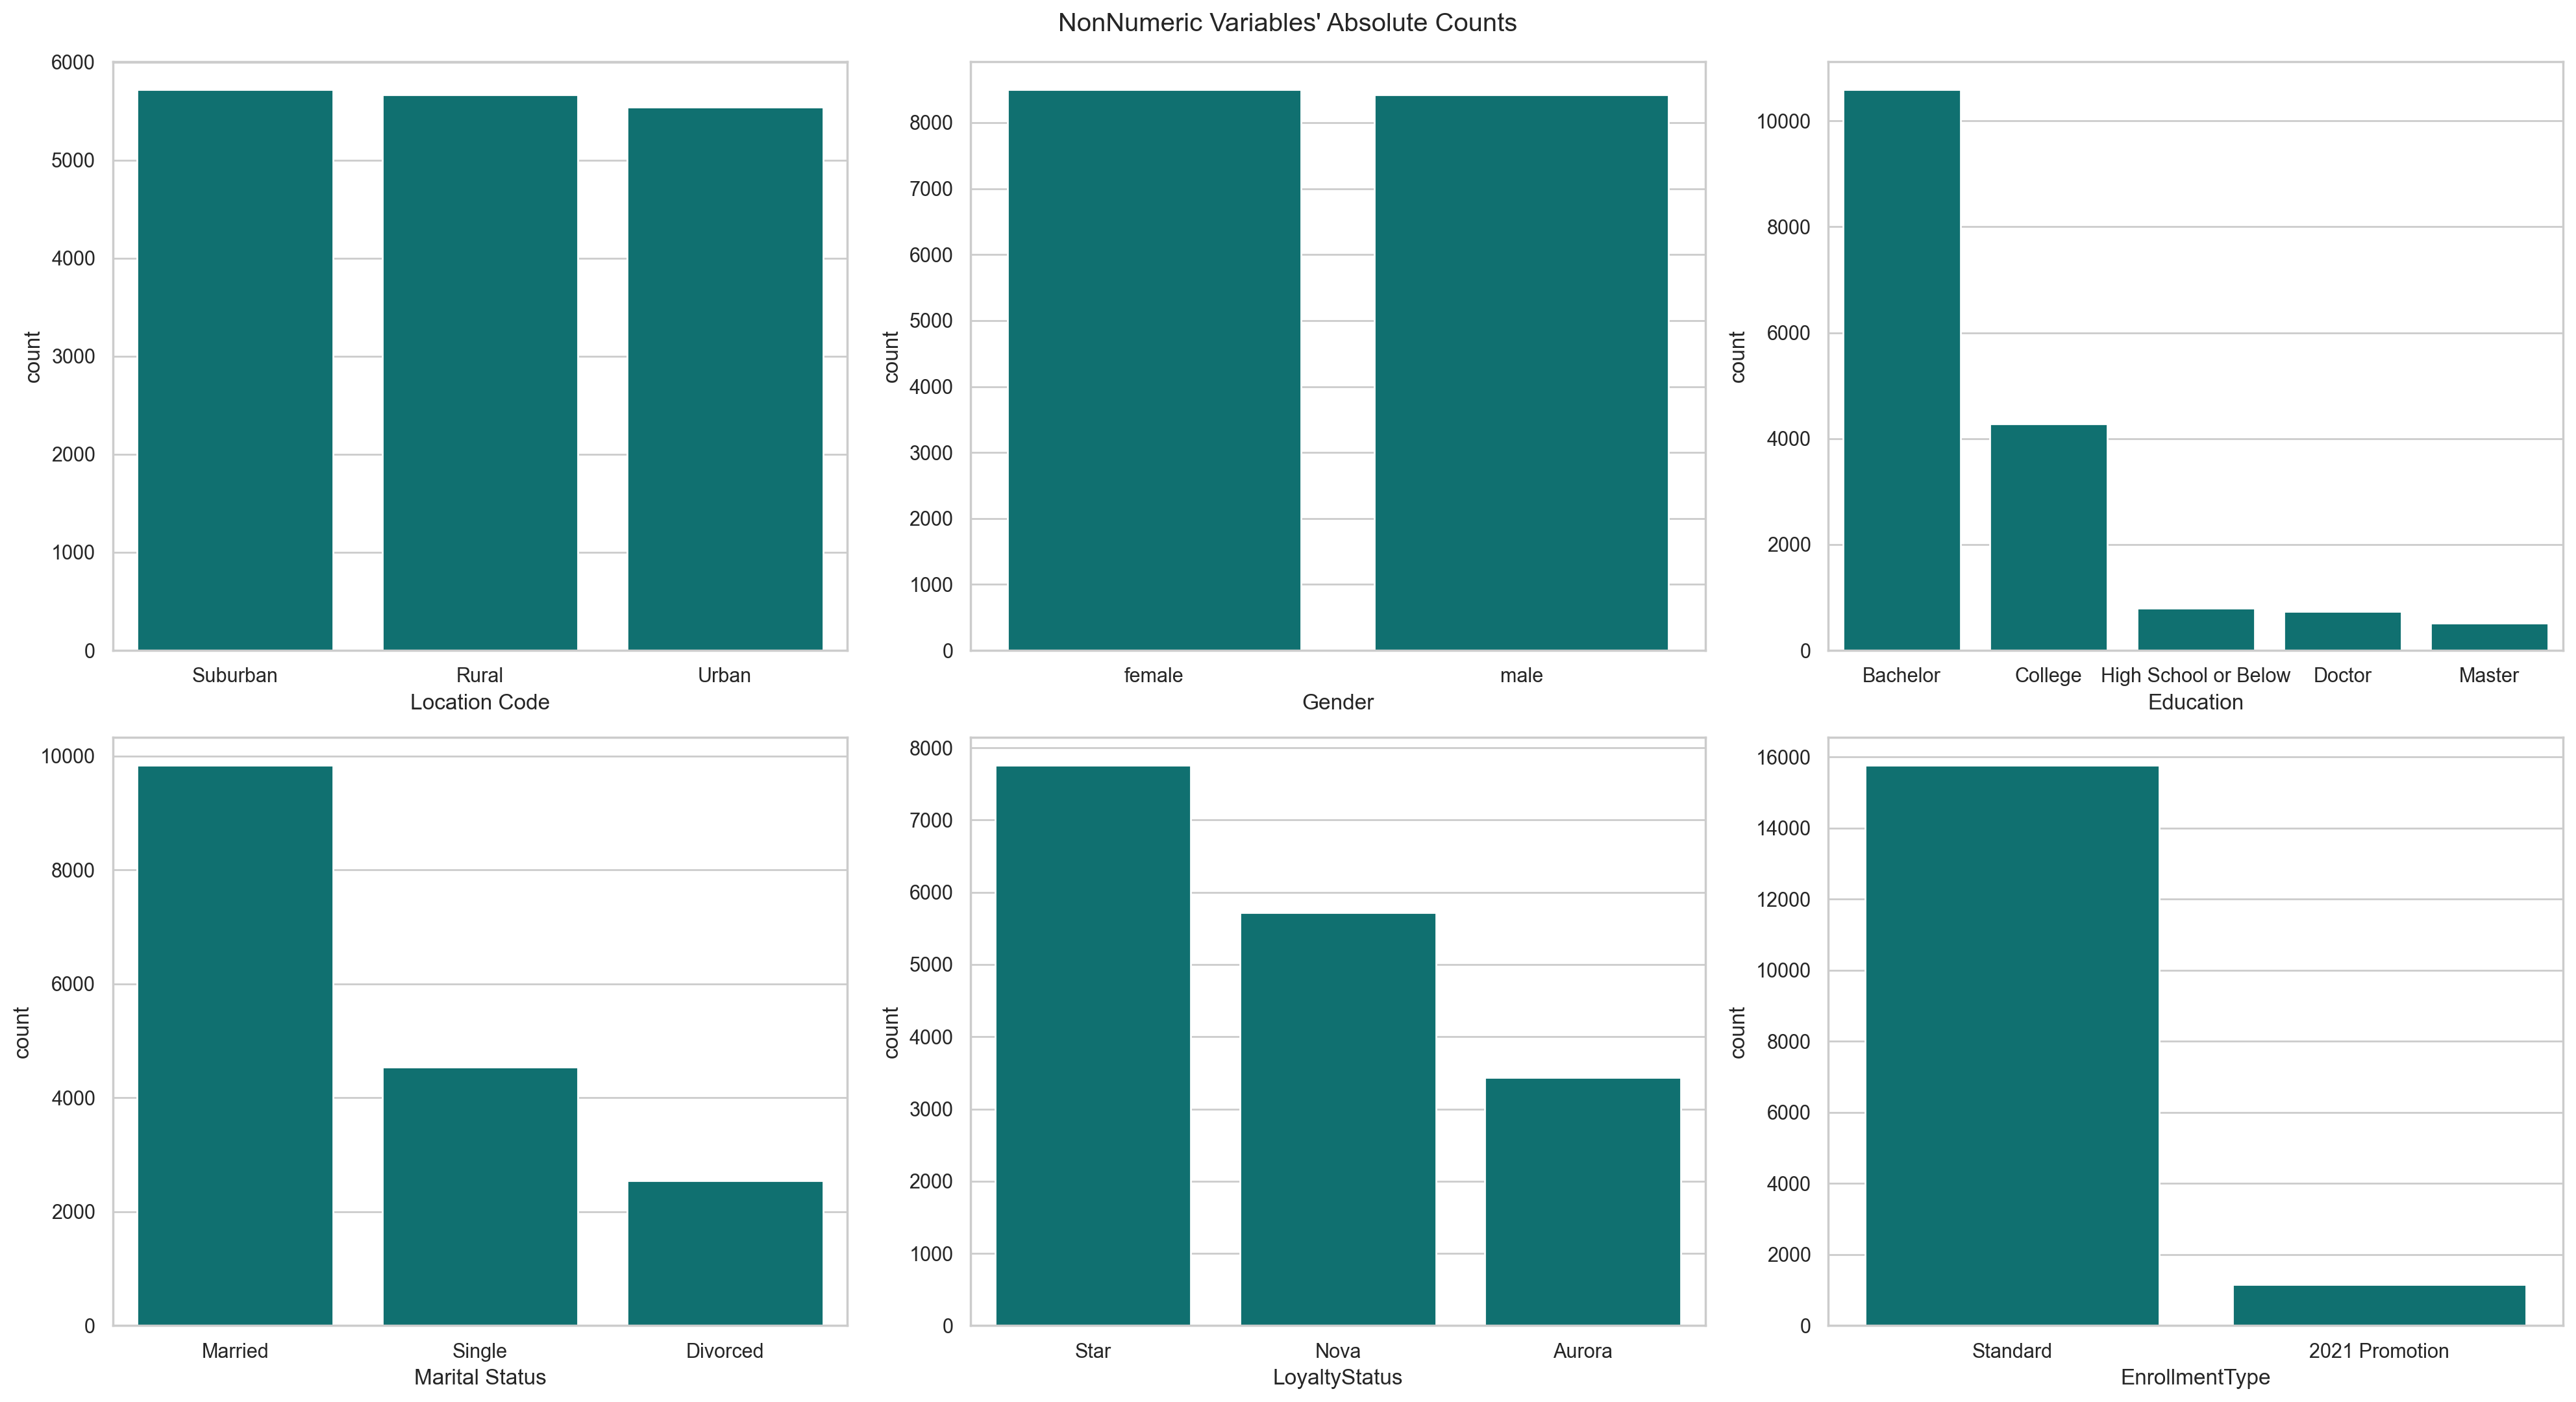

In [13]:
#Plot ALL Non Numeric Variables' Absolute Counts in one figure
non_metric_features = ['Location Code','Gender', 'Education', 'Marital Status','LoyaltyStatus','EnrollmentType']
sns.set() ## Reset to darkgrid

# Setting seaborn style
sns.set_style("whitegrid")

# Setting seaborn context
sns.set_context("notebook")



## What do these do?
sp_rows = 2
sp_cols = ceil(len(non_metric_features) / sp_rows)


# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(sp_rows, 
                         sp_cols, 
                         figsize=(20, 11),
                         tight_layout=True
                        )

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(axes.flatten(), non_metric_features): # Notice the zip() function and flatten() method
    sns.countplot(x=df_customer[feat],order=df_customer[feat].value_counts().index,color=("teal"), ax=ax)
# Layout
# Add a centered title to the figure:
title = "NonNumeric Variables' Absolute Counts"

plt.suptitle(title)
plt.show()

<h1 style="background-color: Teal; color:white; padding:3px 6px; border-radius:4px; font-weight:bold;">
Bivariate Categorical Distribution
</h1>

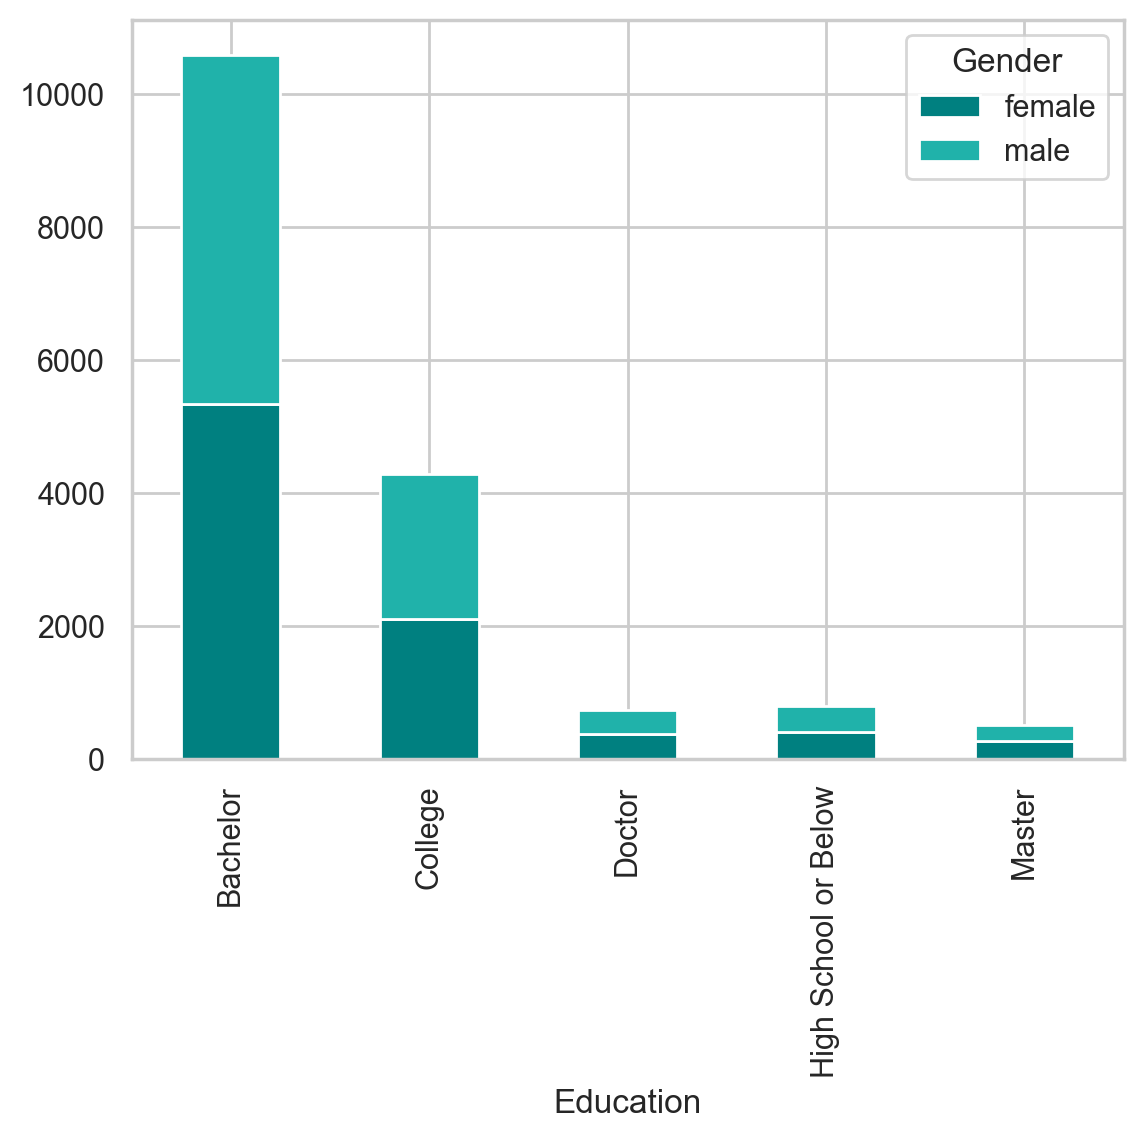

In [14]:
cat1 = 'Gender'
cat2 = 'Education'

catpc_df = df_customer.groupby([cat2, cat1])[cat1].size().unstack()



colors = ['teal', 'lightseagreen']
catpc_df.plot.bar(stacked=True,  color = colors)


plt.show()

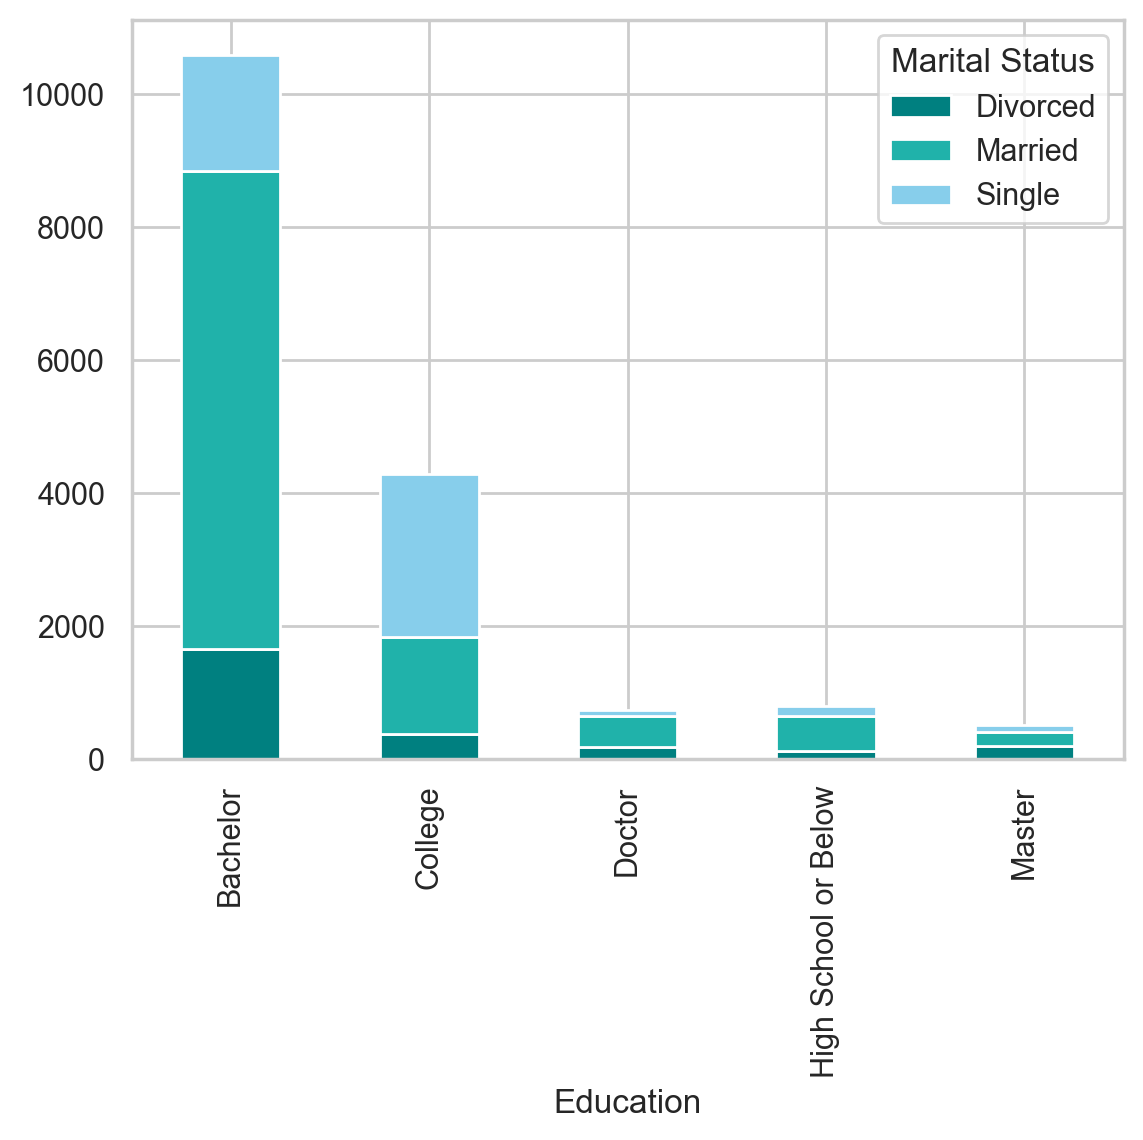

In [15]:
cat1 = 'Marital Status'
cat2 = 'Education'

catpc_df = df_customer.groupby([cat2, cat1])[cat1].size().unstack()



colors = ['teal', 'lightseagreen', 'skyblue']
catpc_df.plot.bar(stacked=True,  color = colors)


plt.show()

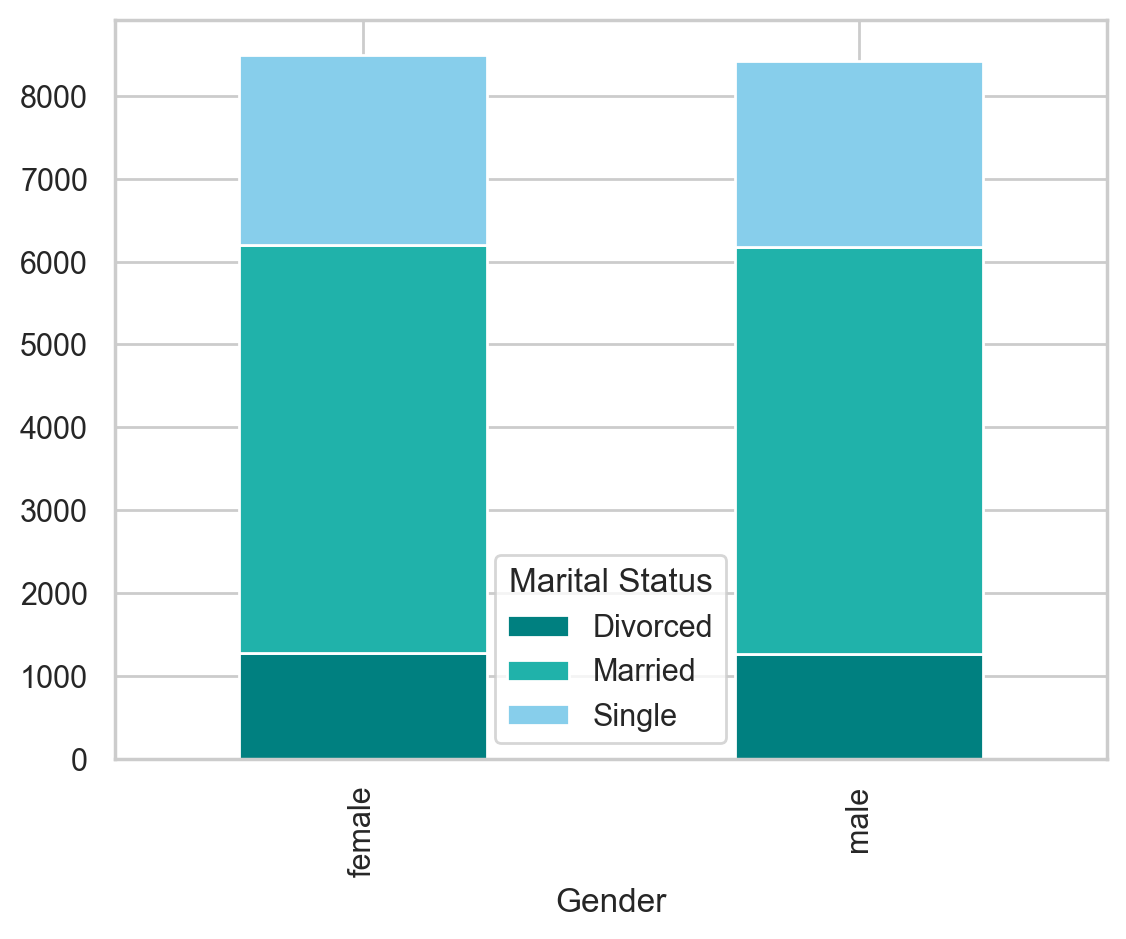

In [16]:
cat1 = 'Marital Status'
cat2 = 'Gender'

catpc_df = df_customer.groupby([cat2, cat1])[cat1].size().unstack()


colors = ['teal', 'lightseagreen', 'skyblue']
catpc_df.plot.bar(stacked=True,  color = colors)


plt.show()

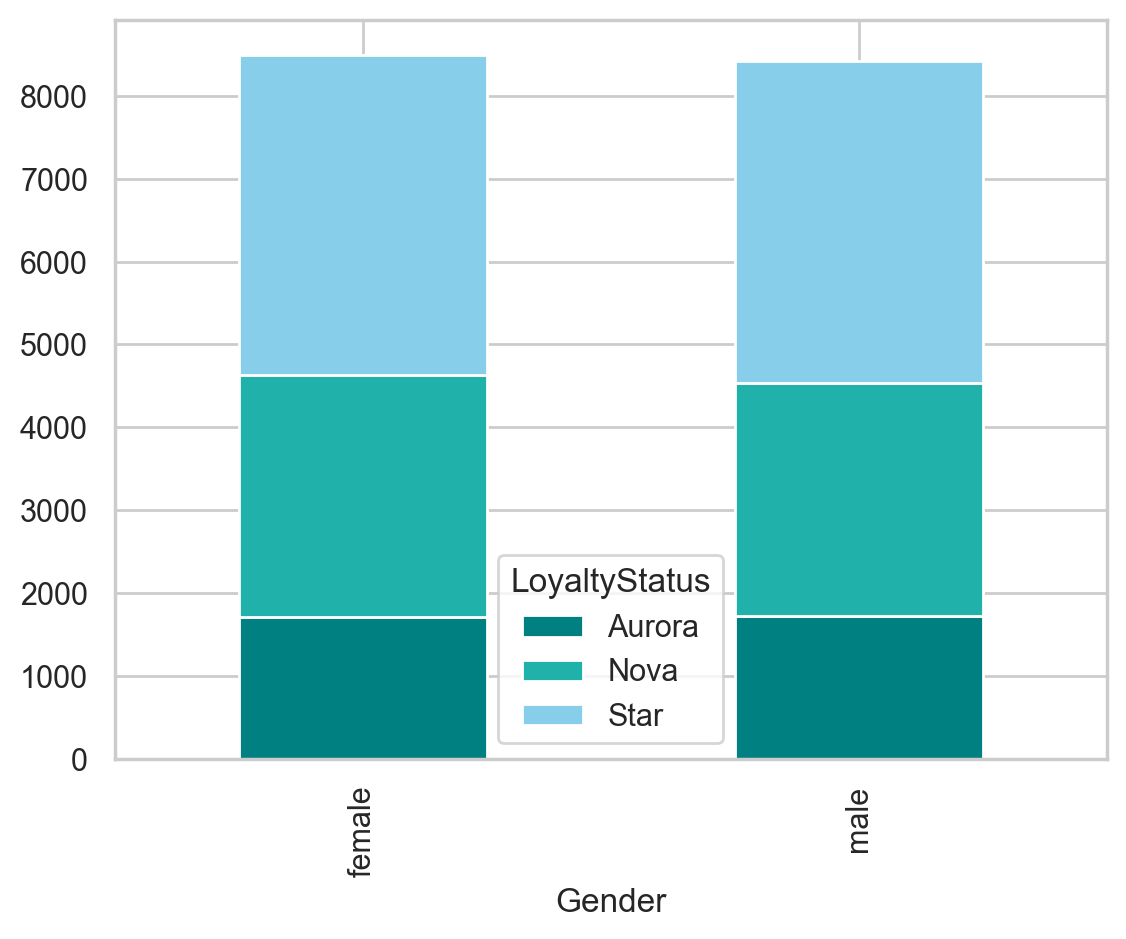

In [17]:
cat1 = 'LoyaltyStatus'
cat2 = 'Gender'

catpc_df = df_customer.groupby([cat2, cat1])[cat1].size().unstack()


colors = ['teal', 'lightseagreen', 'skyblue']
catpc_df.plot.bar(stacked=True,  color = colors)


plt.show()

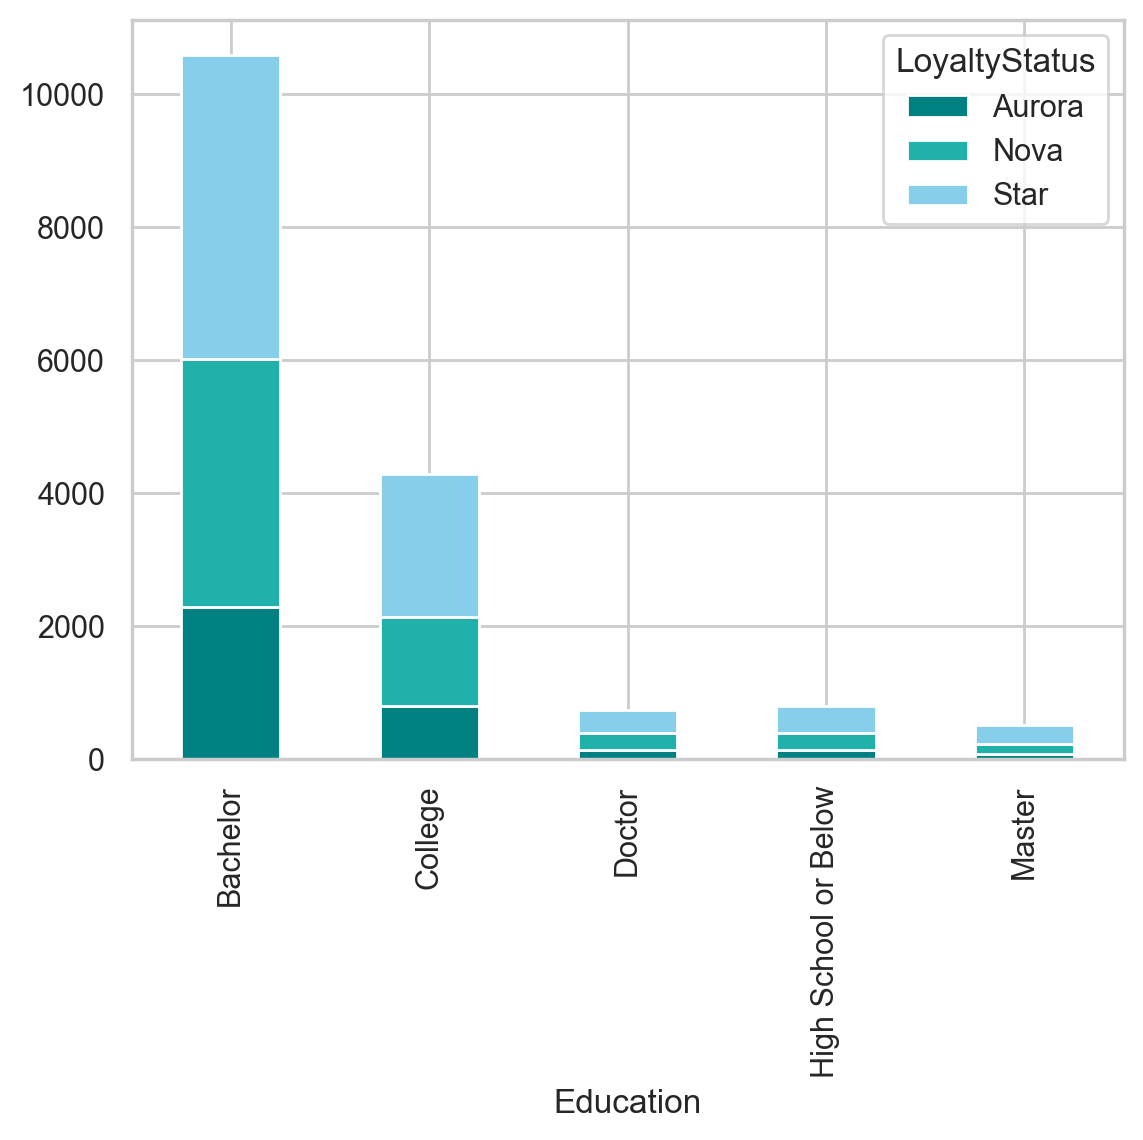

In [18]:
cat1 = 'LoyaltyStatus'
cat2 = 'Education'

catpc_df = df_customer.groupby([cat2, cat1])[cat1].size().unstack()


colors = ['teal', 'lightseagreen', 'skyblue']
catpc_df.plot.bar(stacked=True,  color = colors)


plt.show()

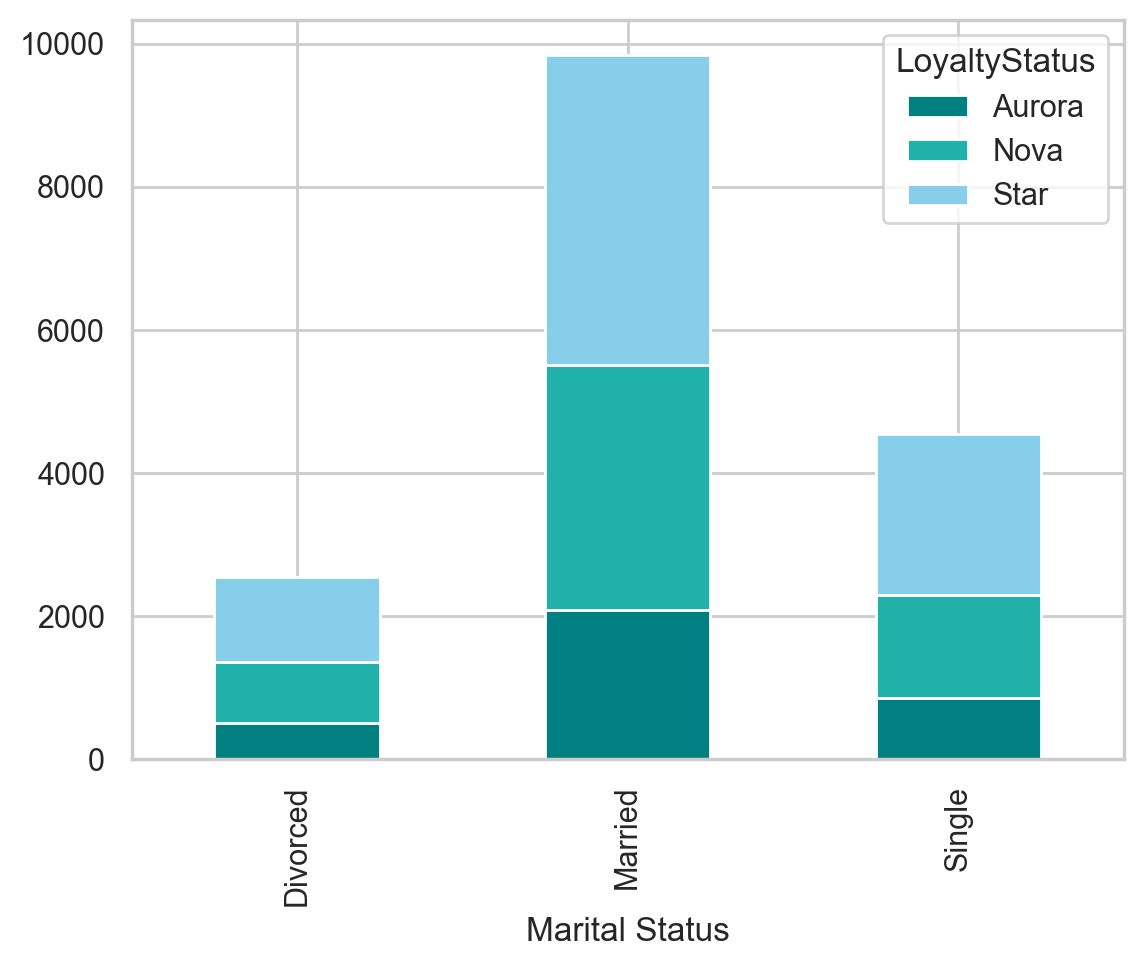

In [19]:
cat1 = 'LoyaltyStatus'
cat2 = 'Marital Status'

catpc_df = df_customer.groupby([cat2, cat1])[cat1].size().unstack()


colors = ['teal', 'lightseagreen', 'skyblue']
catpc_df.plot.bar(stacked=True,  color = colors)


plt.show()

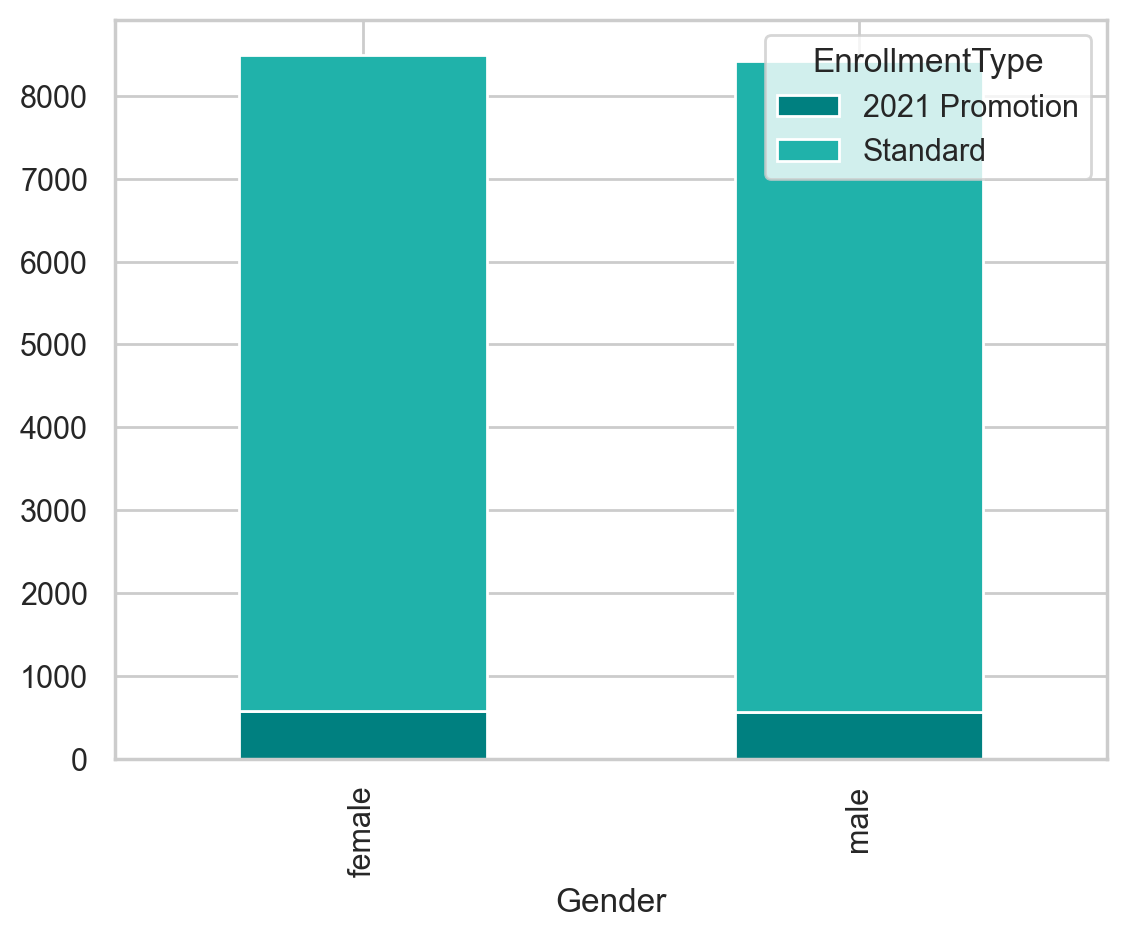

In [20]:
cat1 = 'EnrollmentType'
cat2 = 'Gender'

catpc_df = df_customer.groupby([cat2, cat1])[cat1].size().unstack()


colors = ['teal', 'lightseagreen']
catpc_df.plot.bar(stacked=True,  color = colors)


plt.show()

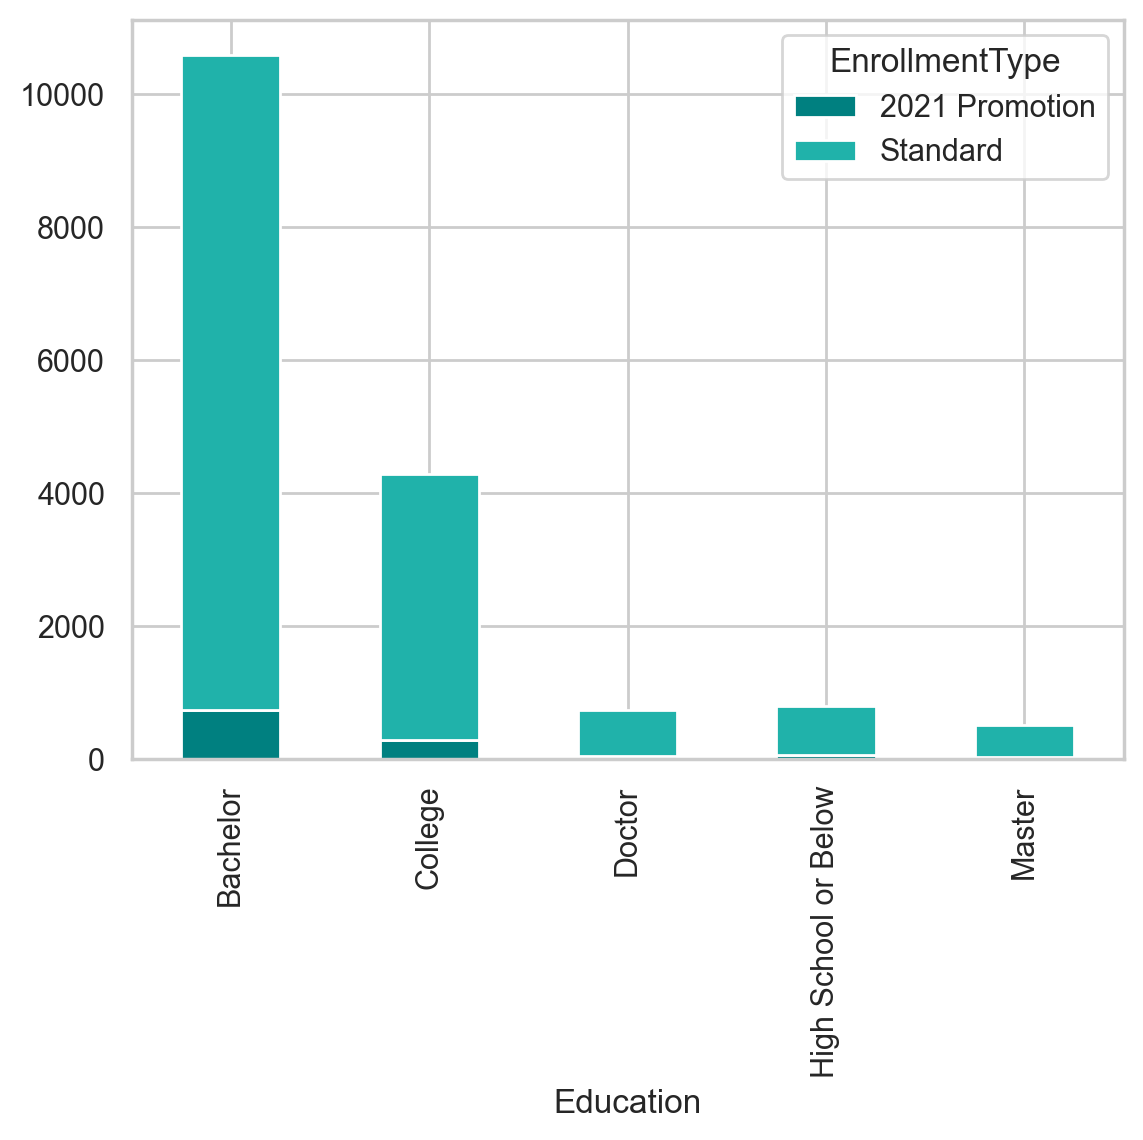

In [21]:
cat1 = 'EnrollmentType'
cat2 = 'Education'

catpc_df = df_customer.groupby([cat2, cat1])[cat1].size().unstack()


colors = ['teal', 'lightseagreen']
catpc_df.plot.bar(stacked=True,  color = colors)


plt.show()

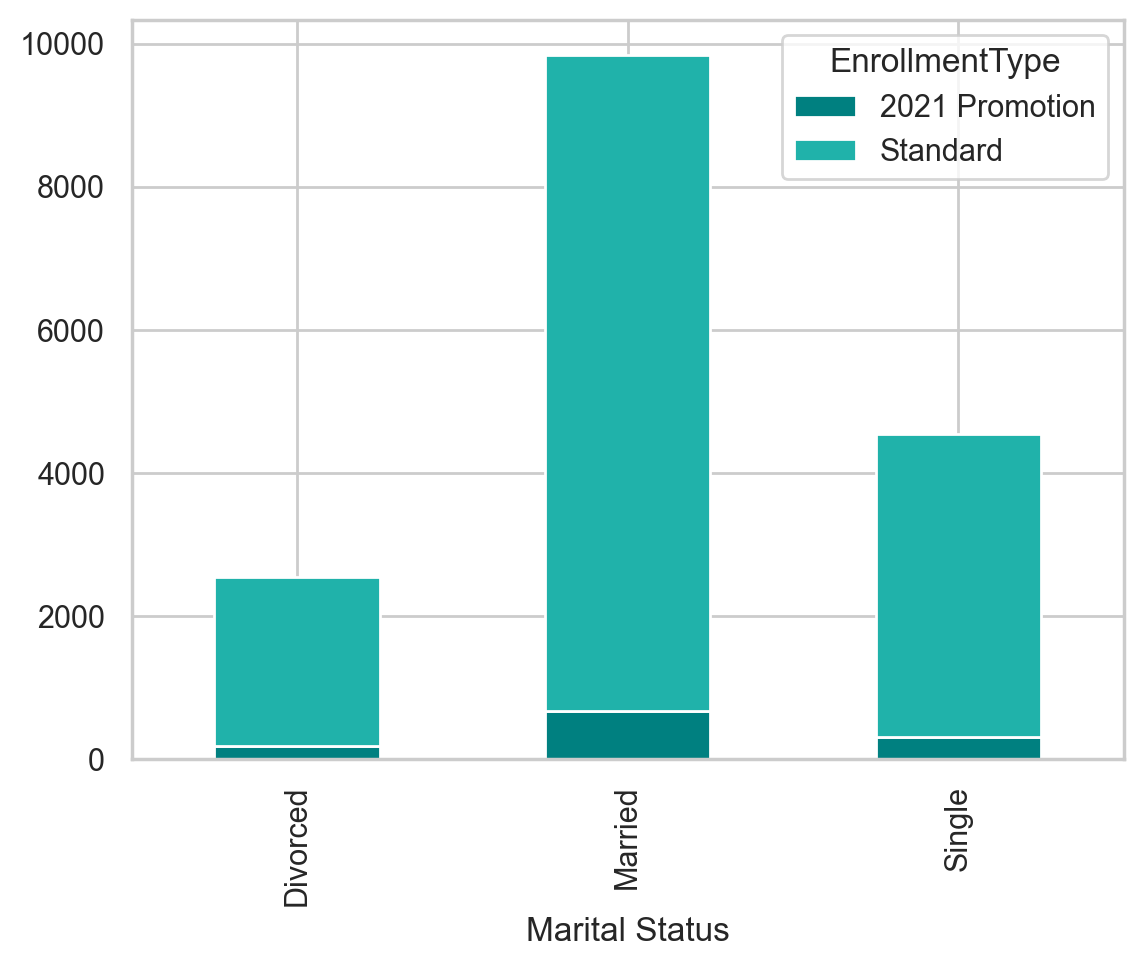

In [22]:
cat1 = 'EnrollmentType'
cat2 = 'Marital Status'

catpc_df = df_customer.groupby([cat2, cat1])[cat1].size().unstack()


colors = ['teal', 'lightseagreen']
catpc_df.plot.bar(stacked=True,  color = colors)


plt.show()

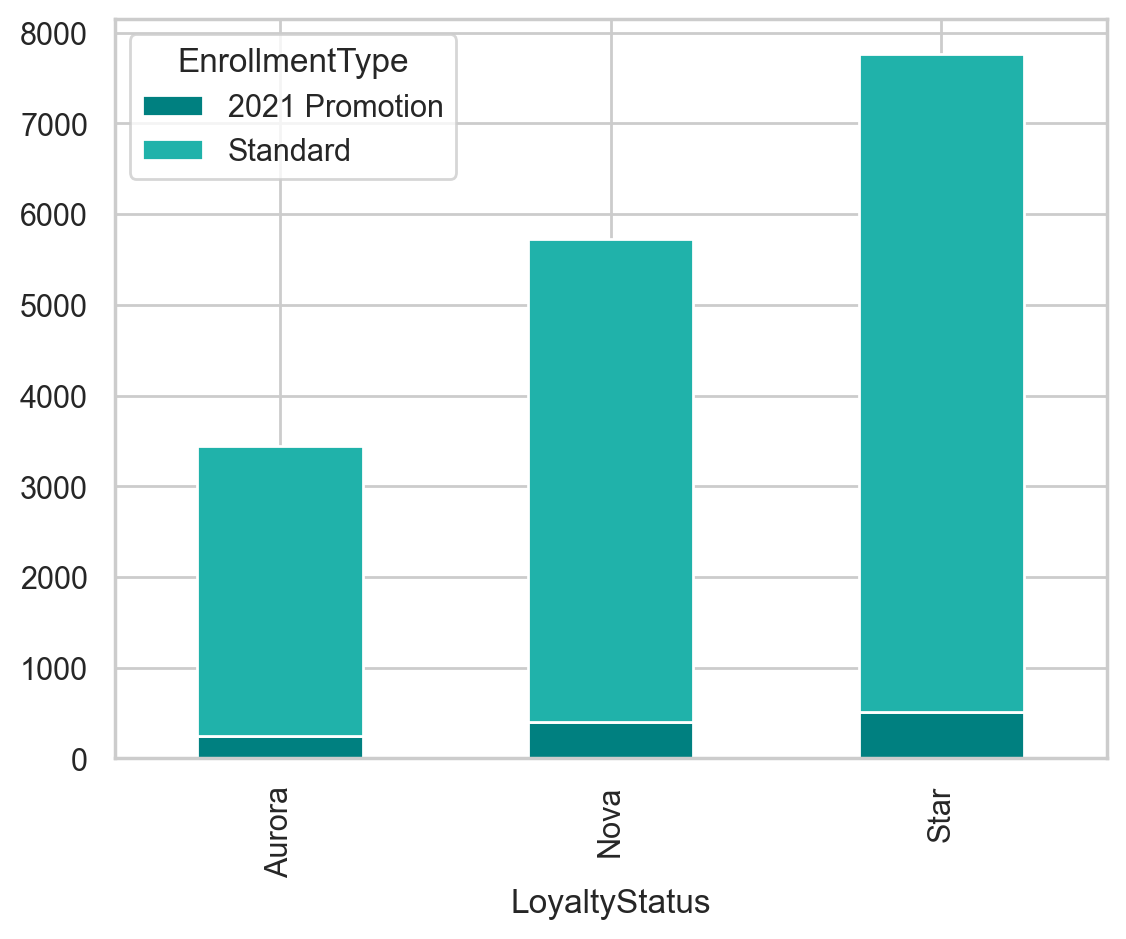

In [23]:
cat1 = 'EnrollmentType'
cat2 = 'LoyaltyStatus'

catpc_df = df_customer.groupby([cat2, cat1])[cat1].size().unstack()


colors = ['teal', 'lightseagreen']
catpc_df.plot.bar(stacked=True,  color = colors)


plt.show()

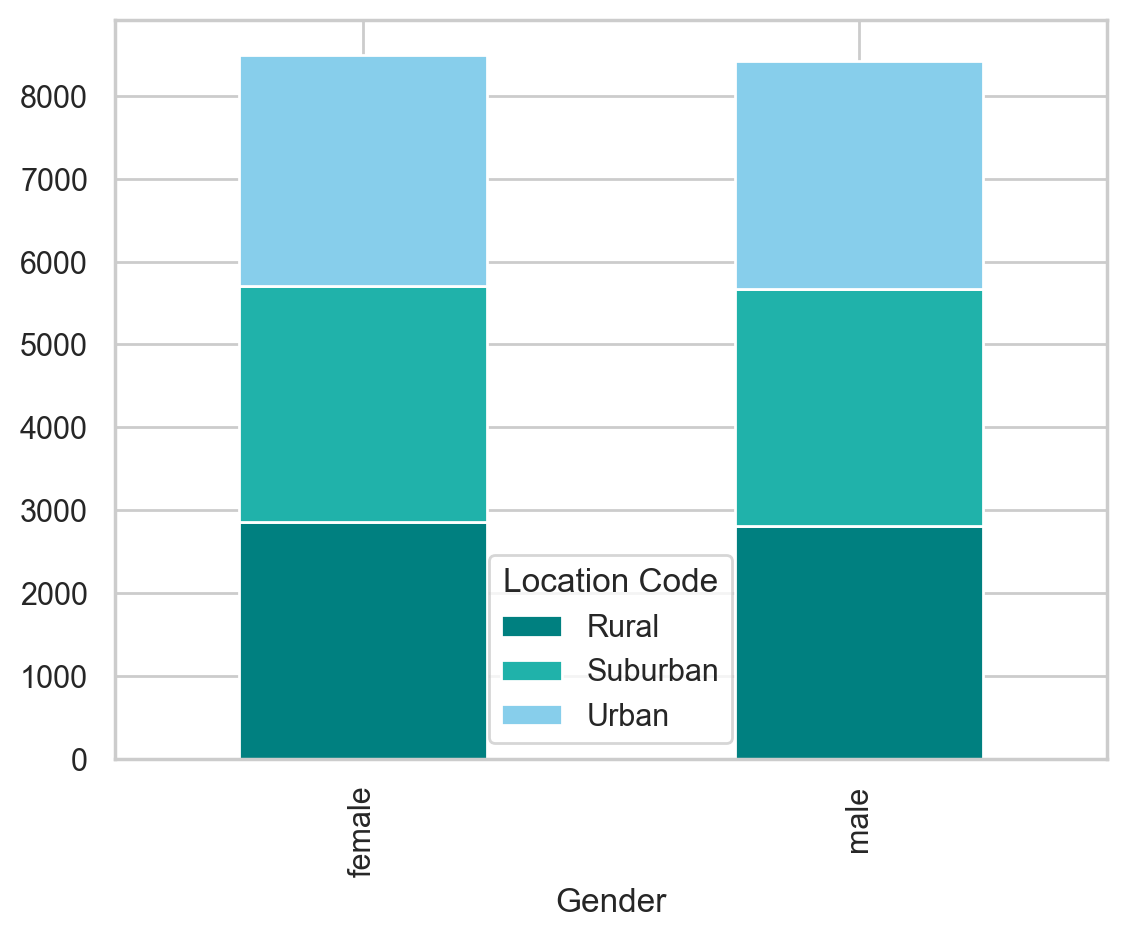

In [24]:
cat1 = 'Location Code'
cat2 = 'Gender'

catpc_df = df_customer.groupby([cat2, cat1])[cat1].size().unstack()


colors = ['teal', 'lightseagreen', 'skyblue']
catpc_df.plot.bar(stacked=True,  color = colors)


plt.show()

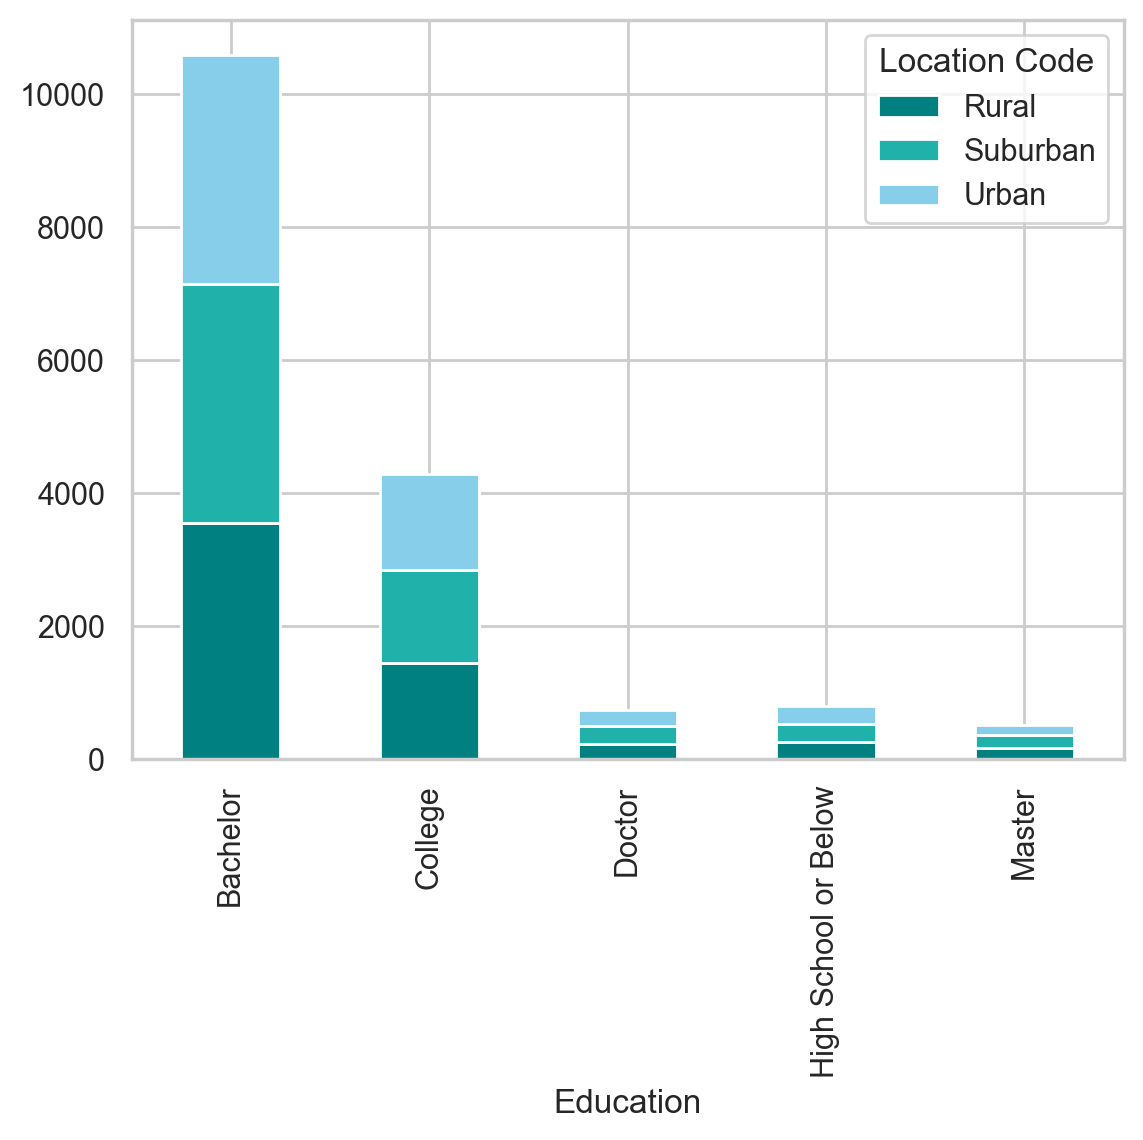

In [25]:
cat1 = 'Location Code'
cat2 = 'Education'

catpc_df = df_customer.groupby([cat2, cat1])[cat1].size().unstack()


colors = ['teal', 'lightseagreen', 'skyblue']
catpc_df.plot.bar(stacked=True,  color = colors)


plt.show()

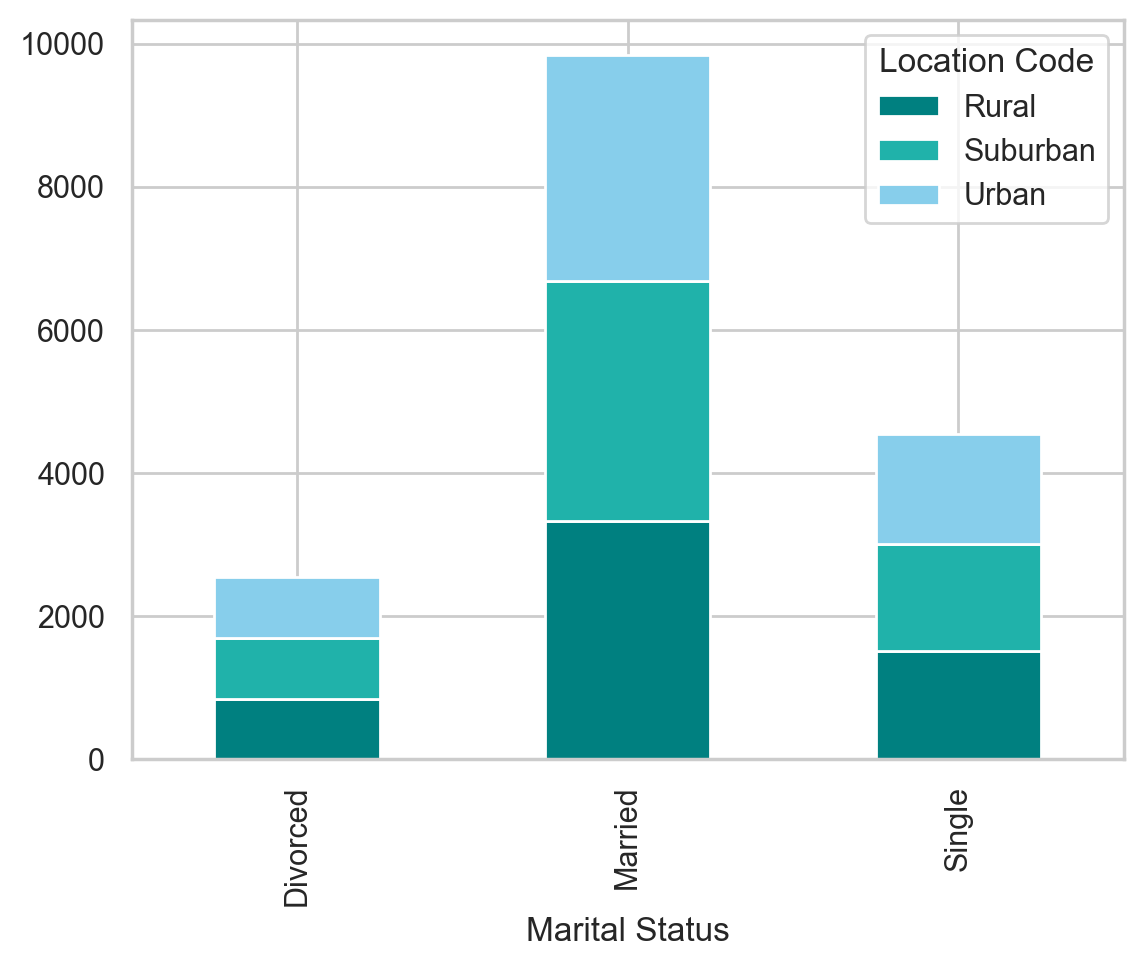

In [26]:
cat1 = 'Location Code'
cat2 = 'Marital Status'

catpc_df = df_customer.groupby([cat2, cat1])[cat1].size().unstack()


colors = ['teal', 'lightseagreen', 'skyblue']
catpc_df.plot.bar(stacked=True,  color = colors)


plt.show()

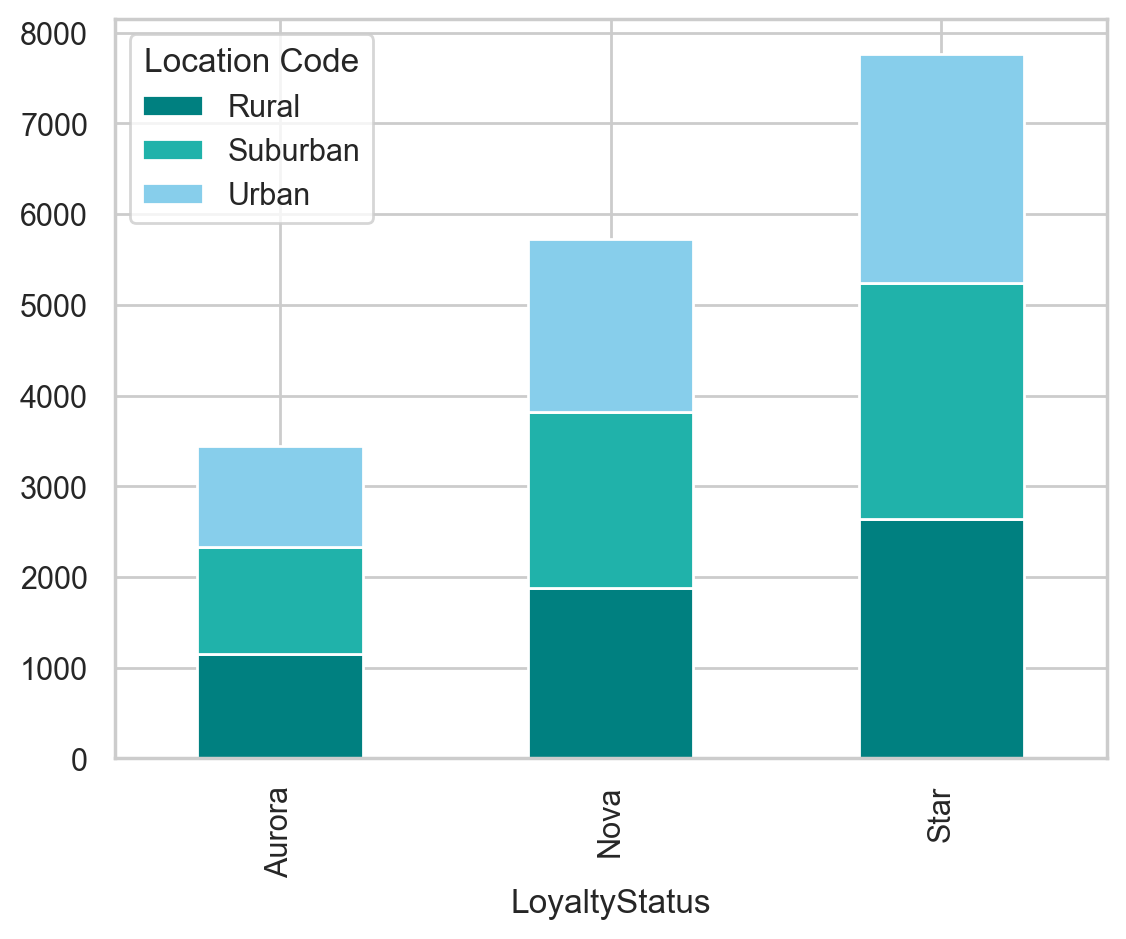

In [27]:
cat1 = 'Location Code'
cat2 = 'LoyaltyStatus'

catpc_df = df_customer.groupby([cat2, cat1])[cat1].size().unstack()

colors = ['teal', 'lightseagreen', 'skyblue']
catpc_df.plot.bar(stacked=True,  color = colors)


plt.show()

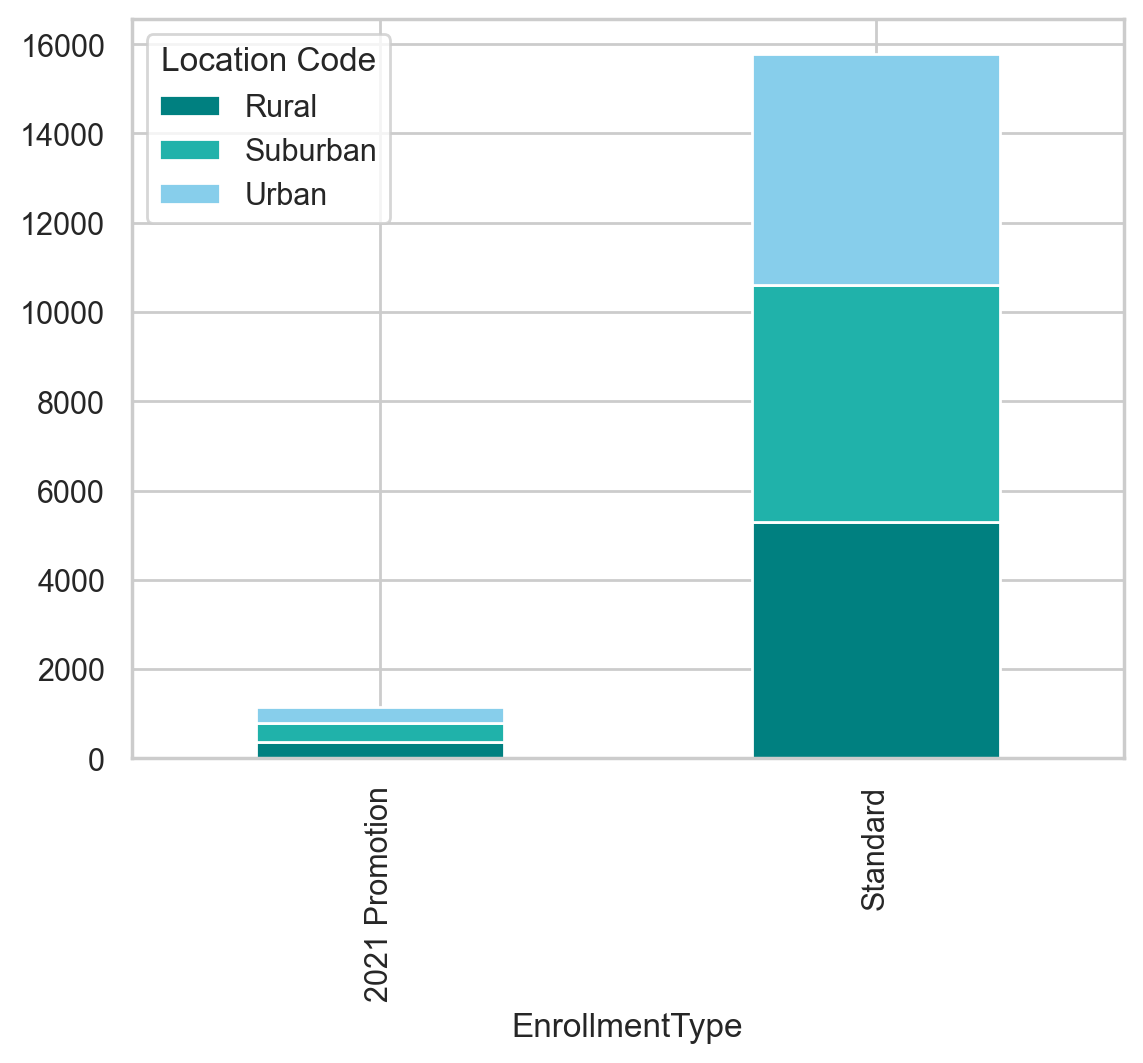

In [28]:
cat1 = 'Location Code'
cat2 = 'EnrollmentType'

catpc_df = df_customer.groupby([cat2, cat1])[cat1].size().unstack()

colors = ['teal', 'lightseagreen', 'skyblue']
catpc_df.plot.bar(stacked=True,  color = colors)


plt.show()

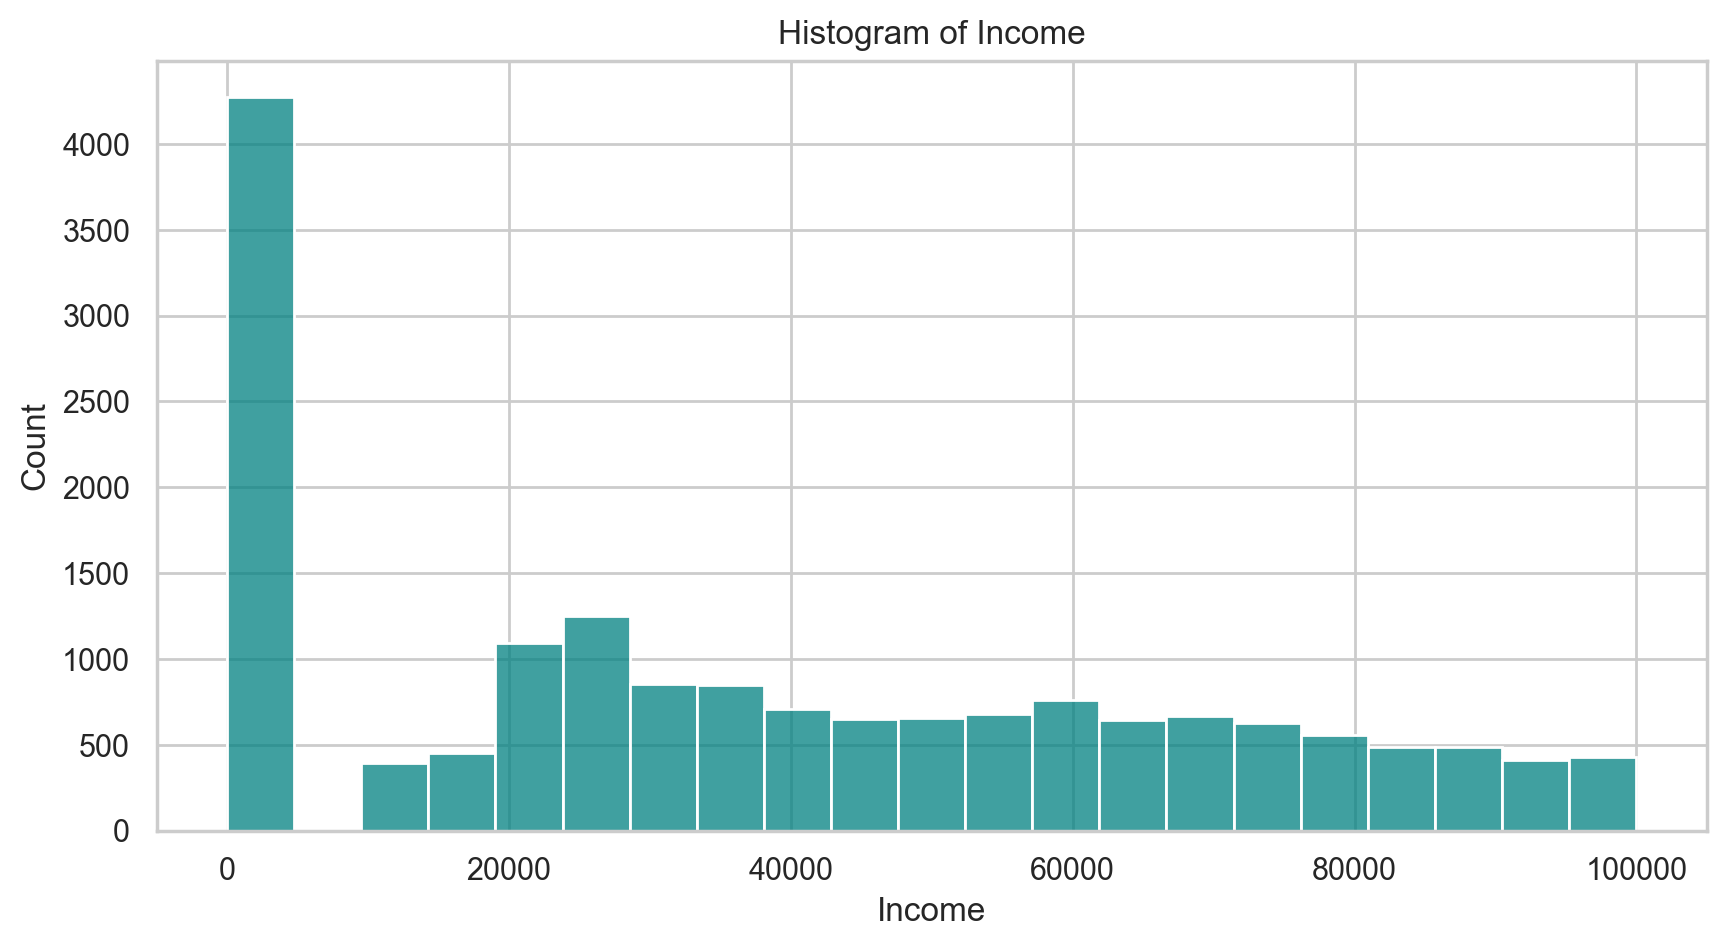

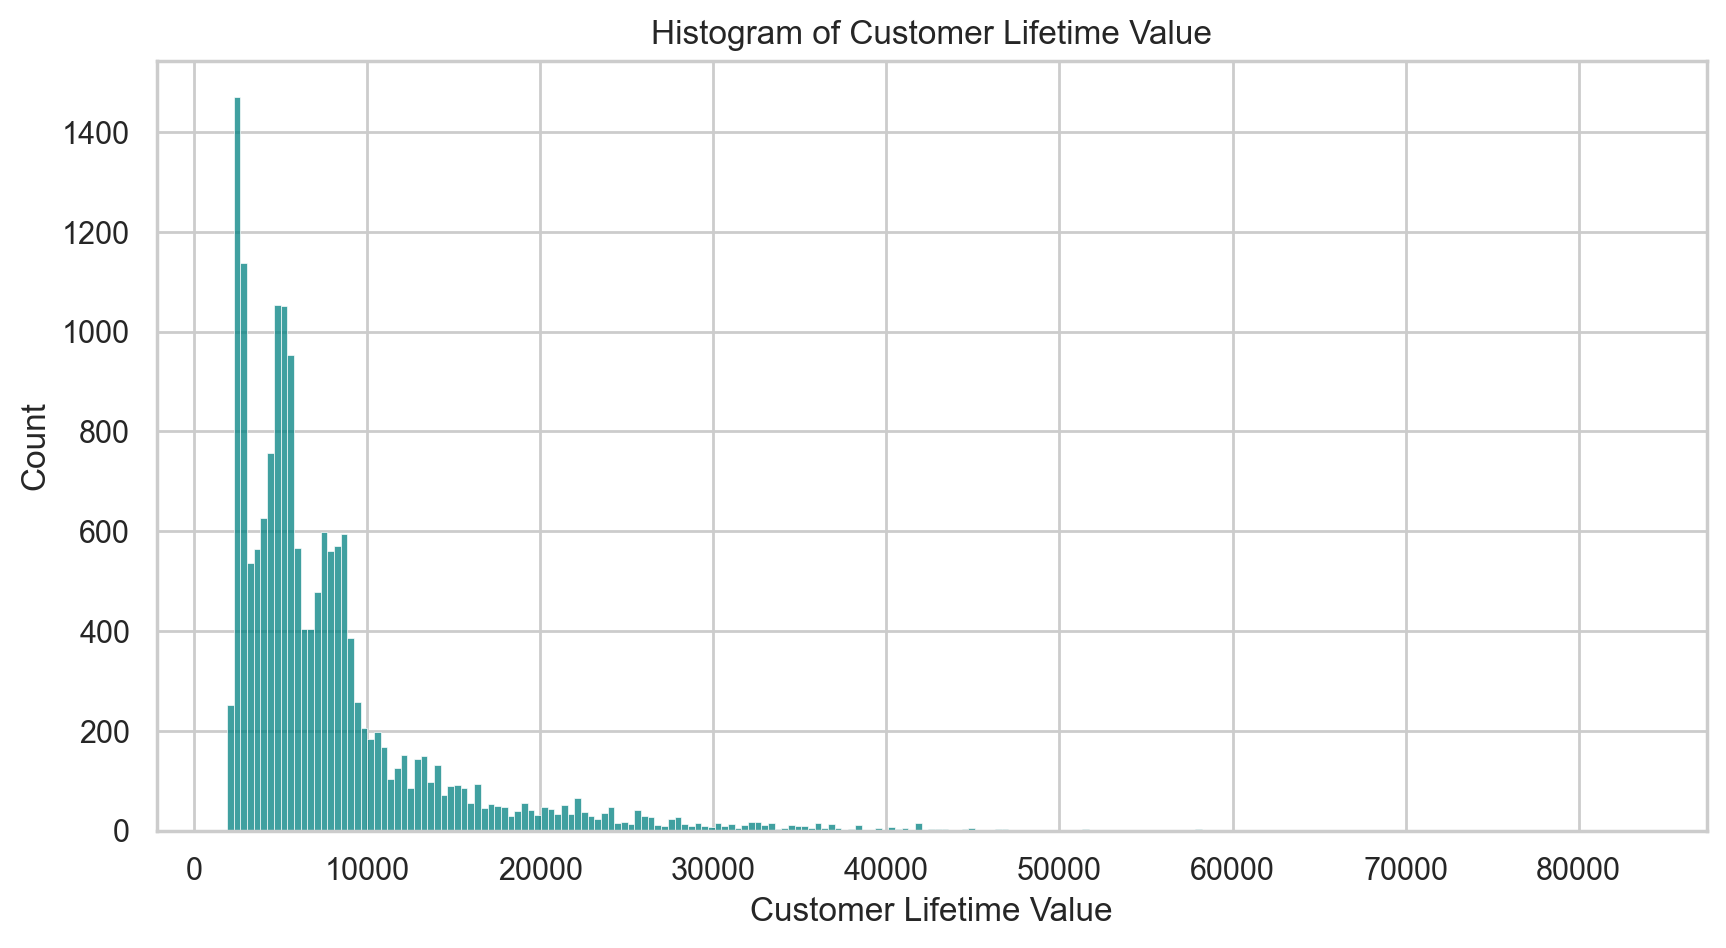

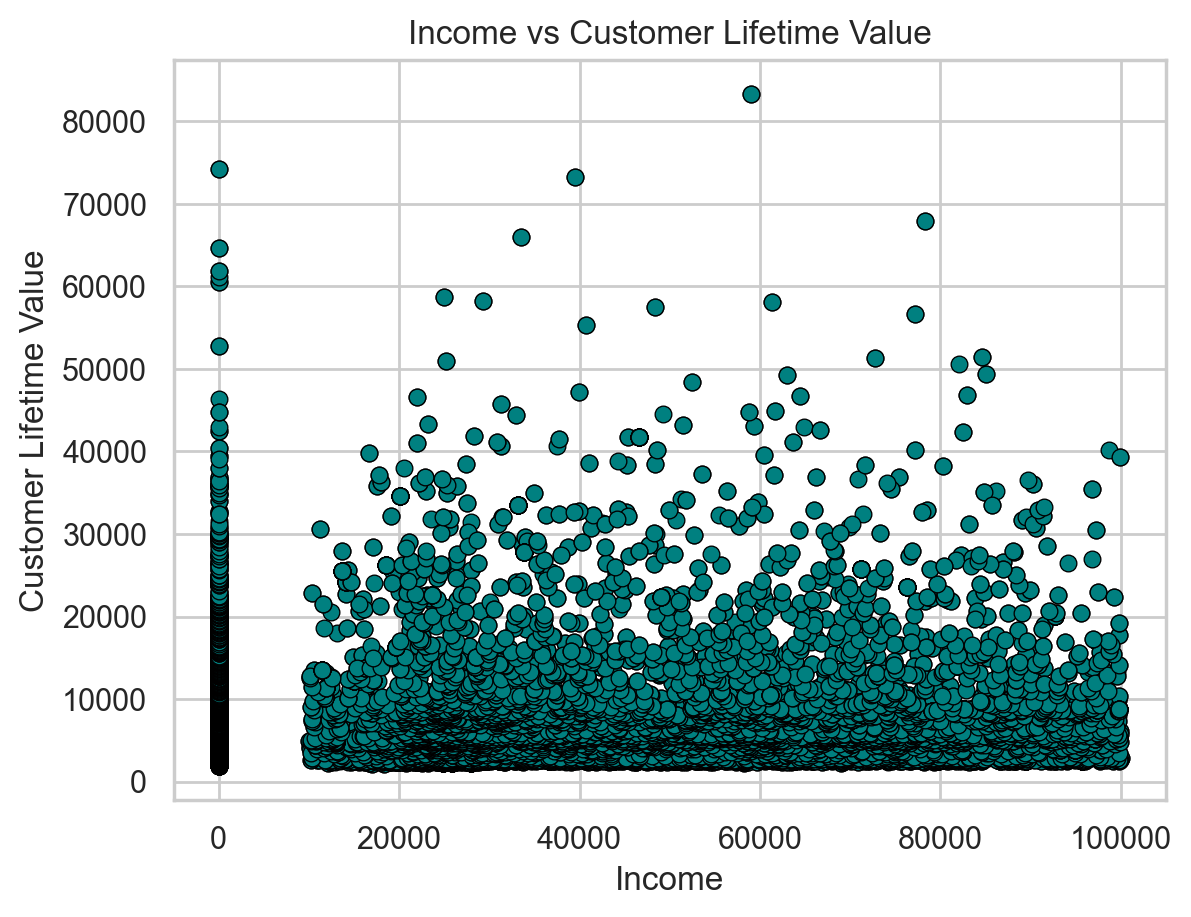

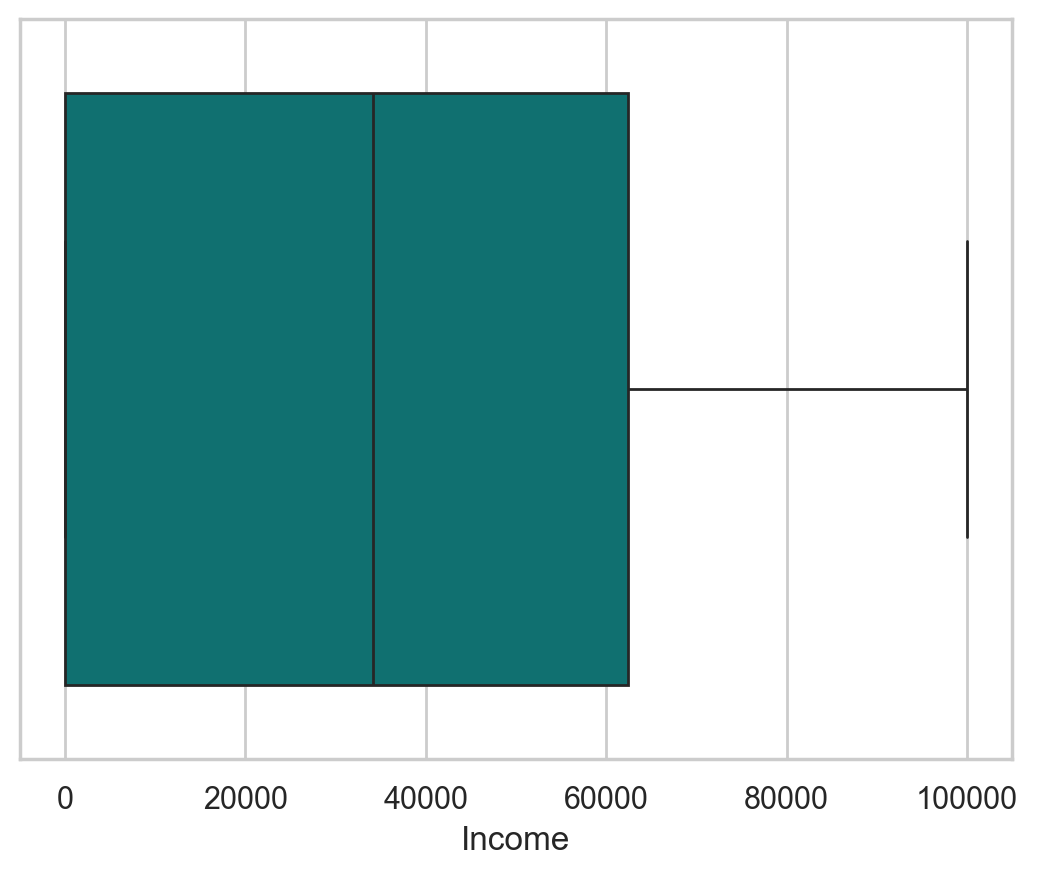

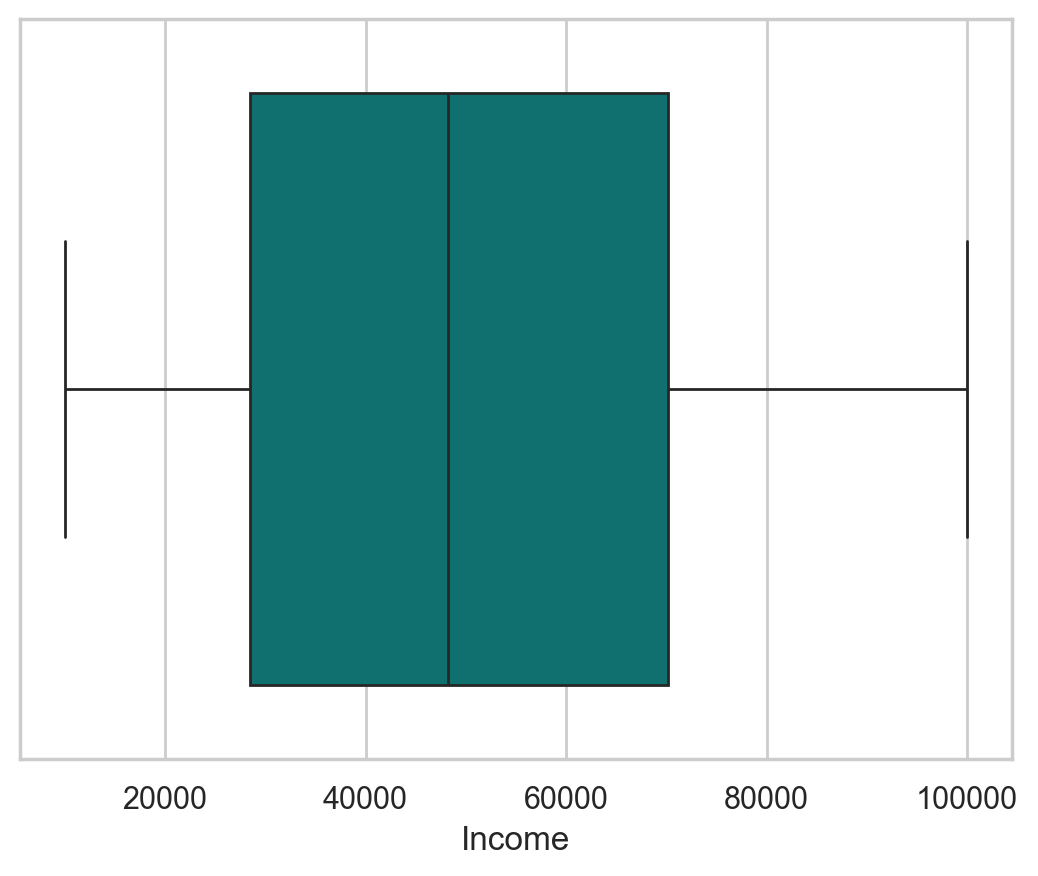

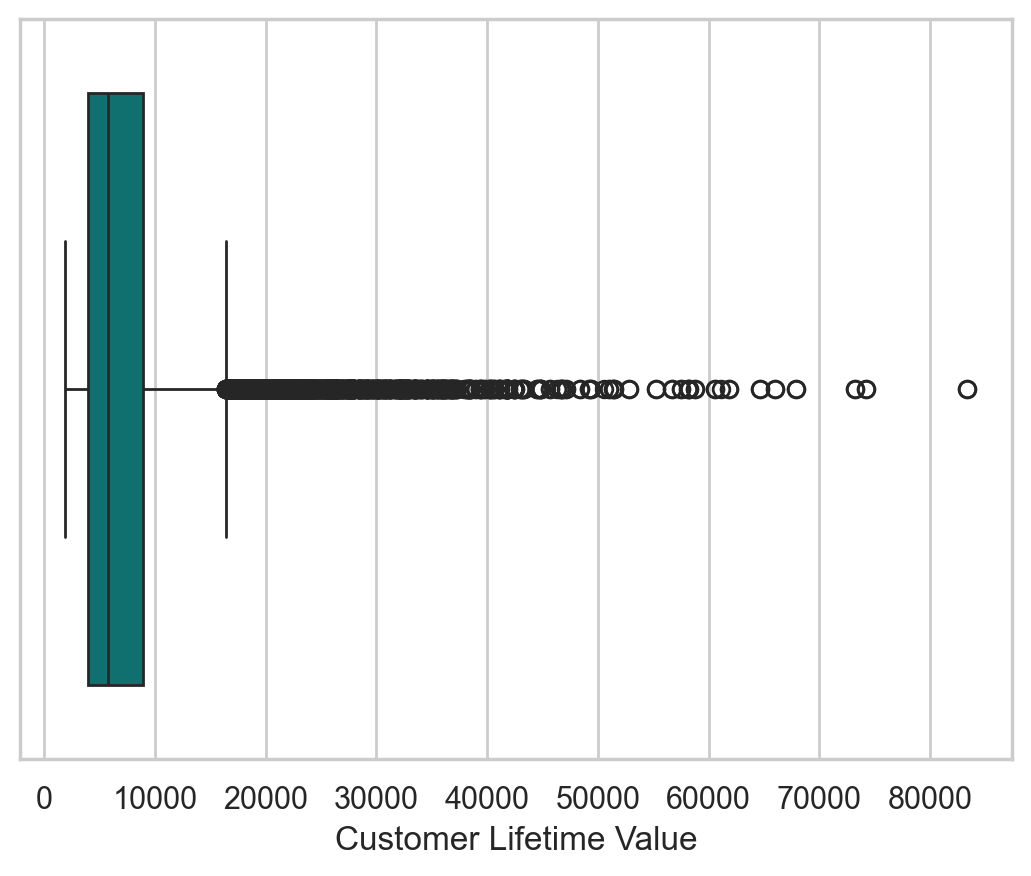

In [29]:
numeric_features = ['Income', 'Customer Lifetime Value']
for i in numeric_features:
    plt.figure(figsize=(10,5))
    sns.histplot(x=df_customer[i], color=("teal"))
    plt.title(f'Histogram of {i}')
    plt.show()

sns.scatterplot(data=df_customer, x='Income', y='Customer Lifetime Value', edgecolor='black', color=("teal"))
plt.title('Income vs Customer Lifetime Value')
plt.show()
sns.boxplot(x = df_customer['Income'], color=("teal"))
plt.show()
sns.boxplot(x = df_customer[df_customer['Income']> 0]['Income'], color=("teal"))
plt.show()
sns.boxplot(x = df_customer['Customer Lifetime Value'], color=("teal"))
plt.show()

In [30]:
df_customer[(df_customer['Income'] == 0)]

,Unnamed: 0,Loyalty#,First Name,Last Name,Customer Name,Country,Province or State,City,Latitude,Longitude,...,Gender,Education,Location Code,Income,Marital Status,LoyaltyStatus,EnrollmentDateOpening,CancellationDate,Customer Lifetime Value,EnrollmentType
1,1,549612,Dayle,Menez,Dayle Menez,Canada,Alberta,Edmonton,53.544388,-113.490930,...,male,College,Rural,0.0,Divorced,Star,3/9/2019,NaN,3839.61,Standard
2,2,429460,Necole,Hannon,Necole Hannon,Canada,British Columbia,Vancouver,49.282730,-123.120740,...,male,College,Urban,0.0,Single,Star,7/14/2017,1/8/2021,3839.75,Standard
3,3,608370,Queen,Hagee,Queen Hagee,Canada,Ontario,Toronto,43.653225,-79.383186,...,male,College,Suburban,0.0,Single,Star,2/17/2016,NaN,3839.75,Standard
6,6,927943,Hue,Sellner,Hue Sellner,Canada,Ontario,Toronto,43.653225,-79.383186,...,female,College,Urban,0.0,Single,Star,6/9/2017,NaN,3857.95,Standard
13,13,988178,Andre,Cotugno,Andre Cotugno,Canada,Quebec,Montreal,45.501690,-73.567253,...,male,College,Rural,0.0,Single,Star,10/13/2016,NaN,3871.07,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16885,16885,632951,Devorah,Litzau,Devorah Litzau,Canada,Alberta,Edmonton,53.544388,-113.490930,...,female,College,Rural,0.0,Married,Star,7/10/2021,NaN,44771.30,Standard
16891,16891,546773,Danyel,Arquitt,Danyel Arquitt,Canada,British Columbia,Vancouver,49.282730,-123.120740,...,male,College,Suburban,0.0,Married,Star,9/6/2018,NaN,52811.49,Standard
16895,16895,900501,Genevieve,Sayyed,Genevieve Sayyed,Canada,Ontario,Sudbury,46.522099,-80.953033,...,male,College,Rural,0.0,Single,Star,9/17/2015,NaN,61134.68,Standard
16896,16896,823768,Mandy,Sammarco,Mandy Sammarco,Canada,British Columbia,Vancouver,49.282730,-123.120740,...,female,College,Rural,0.0,Married,Star,12/22/2015,NaN,61850.19,Standard


In [31]:
# Looking for specific patterns
df_customer[(df_customer['Income'] == 0) & (df_customer['Education'] == "College")]

,Unnamed: 0,Loyalty#,First Name,Last Name,Customer Name,Country,Province or State,City,Latitude,Longitude,...,Gender,Education,Location Code,Income,Marital Status,LoyaltyStatus,EnrollmentDateOpening,CancellationDate,Customer Lifetime Value,EnrollmentType
1,1,549612,Dayle,Menez,Dayle Menez,Canada,Alberta,Edmonton,53.544388,-113.490930,...,male,College,Rural,0.0,Divorced,Star,3/9/2019,NaN,3839.61,Standard
2,2,429460,Necole,Hannon,Necole Hannon,Canada,British Columbia,Vancouver,49.282730,-123.120740,...,male,College,Urban,0.0,Single,Star,7/14/2017,1/8/2021,3839.75,Standard
3,3,608370,Queen,Hagee,Queen Hagee,Canada,Ontario,Toronto,43.653225,-79.383186,...,male,College,Suburban,0.0,Single,Star,2/17/2016,NaN,3839.75,Standard
6,6,927943,Hue,Sellner,Hue Sellner,Canada,Ontario,Toronto,43.653225,-79.383186,...,female,College,Urban,0.0,Single,Star,6/9/2017,NaN,3857.95,Standard
13,13,988178,Andre,Cotugno,Andre Cotugno,Canada,Quebec,Montreal,45.501690,-73.567253,...,male,College,Rural,0.0,Single,Star,10/13/2016,NaN,3871.07,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16885,16885,632951,Devorah,Litzau,Devorah Litzau,Canada,Alberta,Edmonton,53.544388,-113.490930,...,female,College,Rural,0.0,Married,Star,7/10/2021,NaN,44771.30,Standard
16891,16891,546773,Danyel,Arquitt,Danyel Arquitt,Canada,British Columbia,Vancouver,49.282730,-123.120740,...,male,College,Suburban,0.0,Married,Star,9/6/2018,NaN,52811.49,Standard
16895,16895,900501,Genevieve,Sayyed,Genevieve Sayyed,Canada,Ontario,Sudbury,46.522099,-80.953033,...,male,College,Rural,0.0,Single,Star,9/17/2015,NaN,61134.68,Standard
16896,16896,823768,Mandy,Sammarco,Mandy Sammarco,Canada,British Columbia,Vancouver,49.282730,-123.120740,...,female,College,Rural,0.0,Married,Star,12/22/2015,NaN,61850.19,Standard


All of the clients with income 0 are college educated

In [32]:
# Number of unique values in 'Province or State'
df_customer["Province or State"].nunique()

11

<h1 style="background-color: Teal; color:white; padding:3px 6px; border-radius:4px; font-weight:bold;">
Type conversion
</h1>

In [33]:
df_customer["EnrollmentDateOpening"] = pd.to_datetime(df_customer["EnrollmentDateOpening"])
df_customer["CancellationDate"] = pd.to_datetime(df_customer["CancellationDate"], errors='coerce')

<h1 style="background-color: Teal; color:white; padding:3px 6px; border-radius:4px; font-weight:bold;">
NaN's
</h1>

In [34]:
# Checking for missing values
df_customer.isna().sum()

Unnamed: 0                     0
Loyalty#                       0
First Name                     0
Last Name                      0
Customer Name                  0
Country                        0
Province or State              0
City                           0
Latitude                       0
Longitude                      0
Postal code                    0
Gender                         0
Education                      0
Location Code                  0
Income                        20
Marital Status                 0
LoyaltyStatus                  0
EnrollmentDateOpening          0
CancellationDate           14613
Customer Lifetime Value       20
EnrollmentType                 0
dtype: int64

In [35]:
# Looking into missing values in 'Customer Lifetime Value'
df_customer[df_customer['Customer Lifetime Value'].isna()]

,Unnamed: 0,Loyalty#,First Name,Last Name,Customer Name,Country,Province or State,City,Latitude,Longitude,...,Gender,Education,Location Code,Income,Marital Status,LoyaltyStatus,EnrollmentDateOpening,CancellationDate,Customer Lifetime Value,EnrollmentType
16901,0,999987,Layla,Murphy,Layla Murphy,Canada,New Brunswick,Fredericton,46.029263,-66.565150,...,female,Bachelor,Urban,NaN,Single,Star,2017-03-07,2017-03-07,NaN,Standard
16902,1,999988,Jana,Parker,Jana Parker,Canada,Quebec,Montreal,45.573672,-73.523012,...,male,College,Rural,NaN,Single,Star,2017-08-22,2017-08-22,NaN,Standard
16903,2,999989,Ethan,Parker,Ethan Parker,Canada,Ontario,Trenton,44.075379,-77.550375,...,male,College,Rural,NaN,Married,Star,2015-09-12,2015-09-12,NaN,Standard
16904,3,999990,Ryan,Anderson,Ryan Anderson,Canada,New Brunswick,Moncton,46.106617,-64.714267,...,female,College,Rural,NaN,Married,Star,2019-06-10,2019-06-10,NaN,Standard
16905,4,999991,Olivia,Cote,Olivia Cote,Canada,New Brunswick,Fredericton,45.950000,-66.652437,...,female,College,Suburban,NaN,Married,Star,2019-07-20,2019-07-20,NaN,Standard
16906,5,999992,Ella,Roy,Ella Roy,Canada,Ontario,Toronto,43.706878,-79.437412,...,male,College,Suburban,NaN,Single,Star,2021-03-27,2021-03-27,NaN,Standard
16907,6,999993,Elijah,Cook,Elijah Cook,Canada,British Columbia,Dawson Creek,55.701475,-120.181716,...,female,College,Suburban,NaN,Married,Star,2015-01-27,2015-01-27,NaN,Standard
16908,7,999994,Ethan,Chan,Ethan Chan,Canada,Ontario,Ottawa,45.365906,-75.723181,...,female,College,Rural,NaN,Married,Star,2016-05-05,2016-05-05,NaN,Standard
16909,8,999995,Liam,Wong,Liam Wong,Canada,Ontario,Ottawa,45.471557,-75.704868,...,female,College,Suburban,NaN,Married,Star,2020-03-02,2020-03-02,NaN,Standard
16910,9,999996,Isabella,Ross,Isabella Ross,Canada,Ontario,Toronto,43.690489,-79.436758,...,female,Bachelor,Suburban,NaN,Single,Star,2018-09-14,2018-09-14,NaN,Standard


By analyzing the previous dataframe, we can conclude that the NaN values in Income occur in the same rows as the NaN values in Customer Lifetime Value. Since there are only 20 rows, we will drop them.

In [36]:
df_customer.dropna(subset=['Customer Lifetime Value'], inplace=True)

We will handle the NaN values in CancellationDate as shown below, since we interpret NaN as indicating that the customer is still active. Next, we will create a histogram to compare customers who have already canceled the service with those who are still with us. 

In [37]:
print(df_customer["EnrollmentDateOpening"].max())
print(df_customer["CancellationDate"].max())

2021-12-30 00:00:00
2021-12-30 00:00:00


In [38]:
df_customer['CancellationDate'].fillna(pd.to_datetime("2021-12-30 00:00:00") + pd.Timedelta(days=1), inplace=True)

<h1 style="background-color: Teal; color:white; padding:3px 6px; border-radius:4px; font-weight:bold;">
Feature Engineering
</h1>

In [39]:
# Creating a new feature Income_Class which categorizes customers based on whether their income is zero or non-zero
df_customer['Income_Class'] = df_customer['Income'].apply(
    lambda x: 'Zero Income' if x == 0 else 'Non-Zero Income'
)

df_customer['Income_Class'].value_counts()


Income_Class
Non-Zero Income    12628
Zero Income         4273
Name: count, dtype: int64

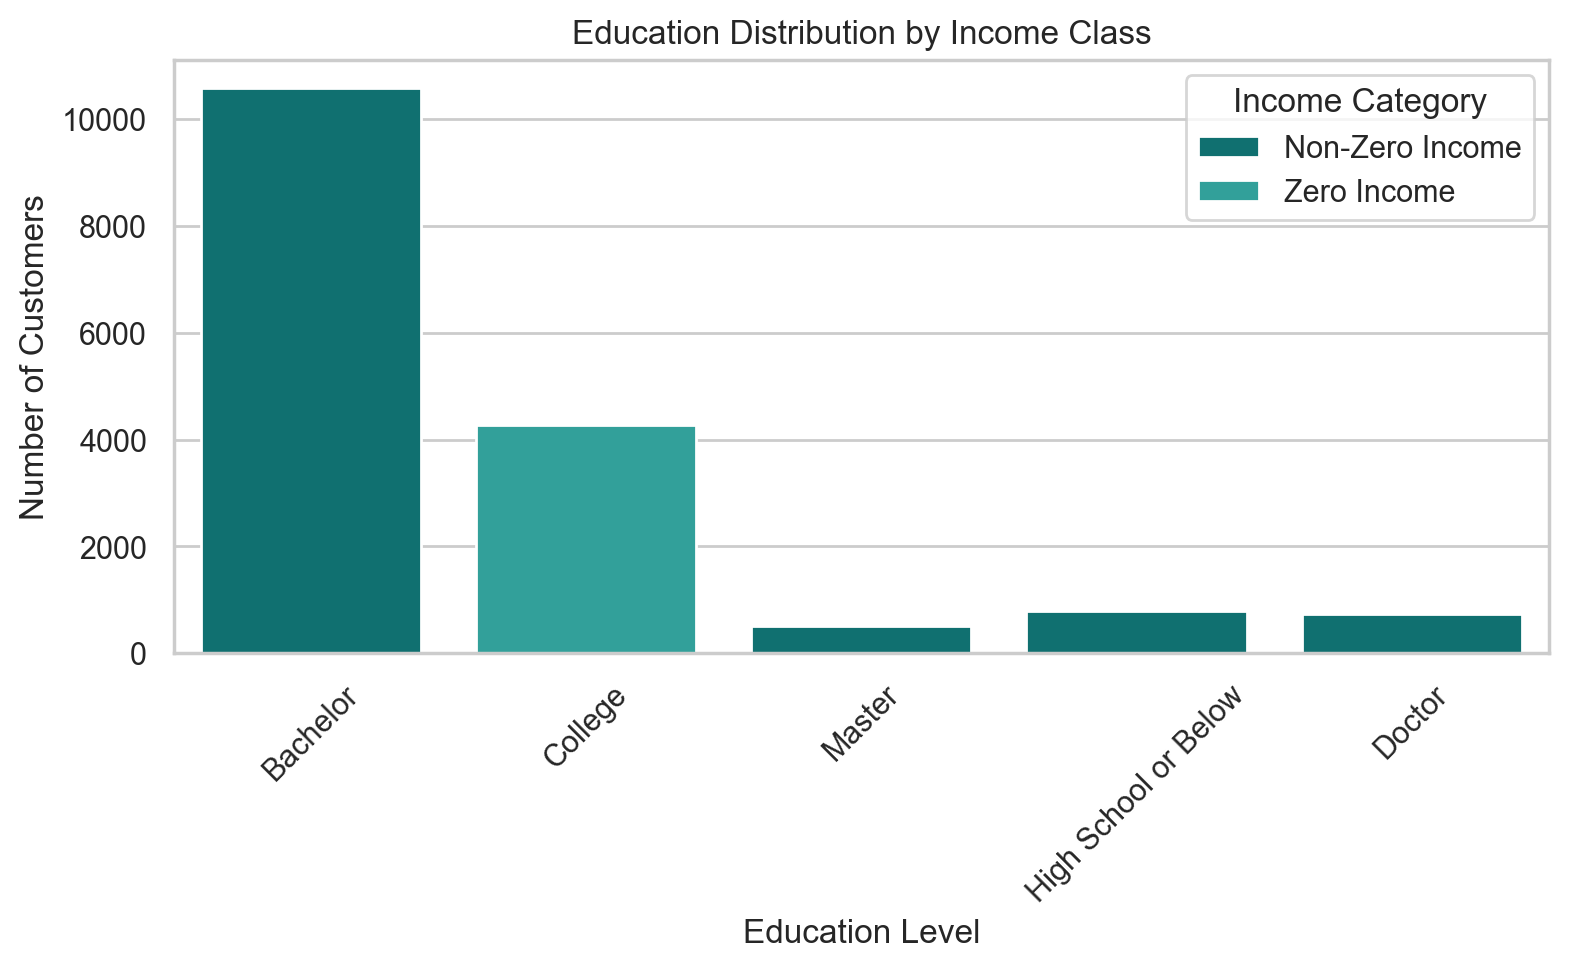

In [40]:
plt.figure(figsize=(8,5))
sns.countplot(
    data=df_customer,
    x='Education',
    hue='Income_Class',
    palette=("teal", 'lightseagreen', 'skyblue')
)
plt.title('Education Distribution by Income Class')
plt.xlabel('Education Level')
plt.ylabel('Number of Customers')
plt.legend(title='Income Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


This feature captures the income distribution among different education levels, which corroborates previous observations about income patterns in the dataset.

In [41]:
df_customer['CustomerTenure'] = (df_customer['CancellationDate'] - df_customer['EnrollmentDateOpening']).dt.days
df_customer

,Unnamed: 0,Loyalty#,First Name,Last Name,Customer Name,Country,Province or State,City,Latitude,Longitude,...,Location Code,Income,Marital Status,LoyaltyStatus,EnrollmentDateOpening,CancellationDate,Customer Lifetime Value,EnrollmentType,Income_Class,CustomerTenure
0,0,480934,Cecilia,Householder,Cecilia Householder,Canada,Ontario,Toronto,43.653225,-79.383186,...,Urban,70146.0,Married,Star,2019-02-15,2021-12-31,3839.14,Standard,Non-Zero Income,1050
1,1,549612,Dayle,Menez,Dayle Menez,Canada,Alberta,Edmonton,53.544388,-113.490930,...,Rural,0.0,Divorced,Star,2019-03-09,2021-12-31,3839.61,Standard,Zero Income,1028
2,2,429460,Necole,Hannon,Necole Hannon,Canada,British Columbia,Vancouver,49.282730,-123.120740,...,Urban,0.0,Single,Star,2017-07-14,2021-01-08,3839.75,Standard,Zero Income,1274
3,3,608370,Queen,Hagee,Queen Hagee,Canada,Ontario,Toronto,43.653225,-79.383186,...,Suburban,0.0,Single,Star,2016-02-17,2021-12-31,3839.75,Standard,Zero Income,2144
4,4,530508,Claire,Latting,Claire Latting,Canada,Quebec,Hull,45.428730,-75.713364,...,Suburban,97832.0,Married,Star,2017-10-25,2021-12-31,3842.79,2021 Promotion,Non-Zero Income,1528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16896,16896,823768,Mandy,Sammarco,Mandy Sammarco,Canada,British Columbia,Vancouver,49.282730,-123.120740,...,Rural,0.0,Married,Star,2015-12-22,2021-12-31,61850.19,Standard,Zero Income,2201
16897,16897,680886,Jamee,Ahlm,Jamee Ahlm,Canada,Saskatchewan,Regina,50.445210,-104.618900,...,Rural,78310.0,Married,Star,2017-09-06,2021-12-31,67907.27,Standard,Non-Zero Income,1577
16898,16898,776187,Janina,Lumb,Janina Lumb,Canada,British Columbia,Vancouver,49.282730,-123.120740,...,Urban,0.0,Single,Star,2017-03-24,2021-12-31,74228.52,Standard,Zero Income,1743
16899,16899,615459,Dannie,Paplow,Dannie Paplow,Canada,Quebec,Montreal,45.501690,-73.567253,...,Urban,58958.0,Married,Star,2021-04-22,2021-12-22,83325.38,2021 Promotion,Non-Zero Income,244


In [42]:
df_customer['Active_Client'] = np.where(df_customer['CancellationDate'] == pd.to_datetime("2021-12-31"), 'Active', 'Inactive')
df_customer[df_customer['Active_Client']=='Active']

,Unnamed: 0,Loyalty#,First Name,Last Name,Customer Name,Country,Province or State,City,Latitude,Longitude,...,Income,Marital Status,LoyaltyStatus,EnrollmentDateOpening,CancellationDate,Customer Lifetime Value,EnrollmentType,Income_Class,CustomerTenure,Active_Client
0,0,480934,Cecilia,Householder,Cecilia Householder,Canada,Ontario,Toronto,43.653225,-79.383186,...,70146.0,Married,Star,2019-02-15,2021-12-31,3839.14,Standard,Non-Zero Income,1050,Active
1,1,549612,Dayle,Menez,Dayle Menez,Canada,Alberta,Edmonton,53.544388,-113.490930,...,0.0,Divorced,Star,2019-03-09,2021-12-31,3839.61,Standard,Zero Income,1028,Active
3,3,608370,Queen,Hagee,Queen Hagee,Canada,Ontario,Toronto,43.653225,-79.383186,...,0.0,Single,Star,2016-02-17,2021-12-31,3839.75,Standard,Zero Income,2144,Active
4,4,530508,Claire,Latting,Claire Latting,Canada,Quebec,Hull,45.428730,-75.713364,...,97832.0,Married,Star,2017-10-25,2021-12-31,3842.79,2021 Promotion,Non-Zero Income,1528,Active
5,5,193662,Leatrice,Hanlin,Leatrice Hanlin,Canada,Yukon,Whitehorse,60.721188,-135.056840,...,26262.0,Married,Star,2015-05-07,2021-12-31,3844.57,Standard,Non-Zero Income,2430,Active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16893,16893,302460,Suanne,Parraga,Suanne Parraga,Canada,British Columbia,Whistler,50.116322,-122.957360,...,77237.0,Married,Star,2017-09-21,2021-12-31,56675.94,Standard,Non-Zero Income,1562,Active
16895,16895,900501,Genevieve,Sayyed,Genevieve Sayyed,Canada,Ontario,Sudbury,46.522099,-80.953033,...,0.0,Single,Star,2015-09-17,2021-12-31,61134.68,Standard,Zero Income,2297,Active
16896,16896,823768,Mandy,Sammarco,Mandy Sammarco,Canada,British Columbia,Vancouver,49.282730,-123.120740,...,0.0,Married,Star,2015-12-22,2021-12-31,61850.19,Standard,Zero Income,2201,Active
16897,16897,680886,Jamee,Ahlm,Jamee Ahlm,Canada,Saskatchewan,Regina,50.445210,-104.618900,...,78310.0,Married,Star,2017-09-06,2021-12-31,67907.27,Standard,Non-Zero Income,1577,Active


C:\Users\filip\AppData\Local\Temp\ipykernel_12920\3415824710.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


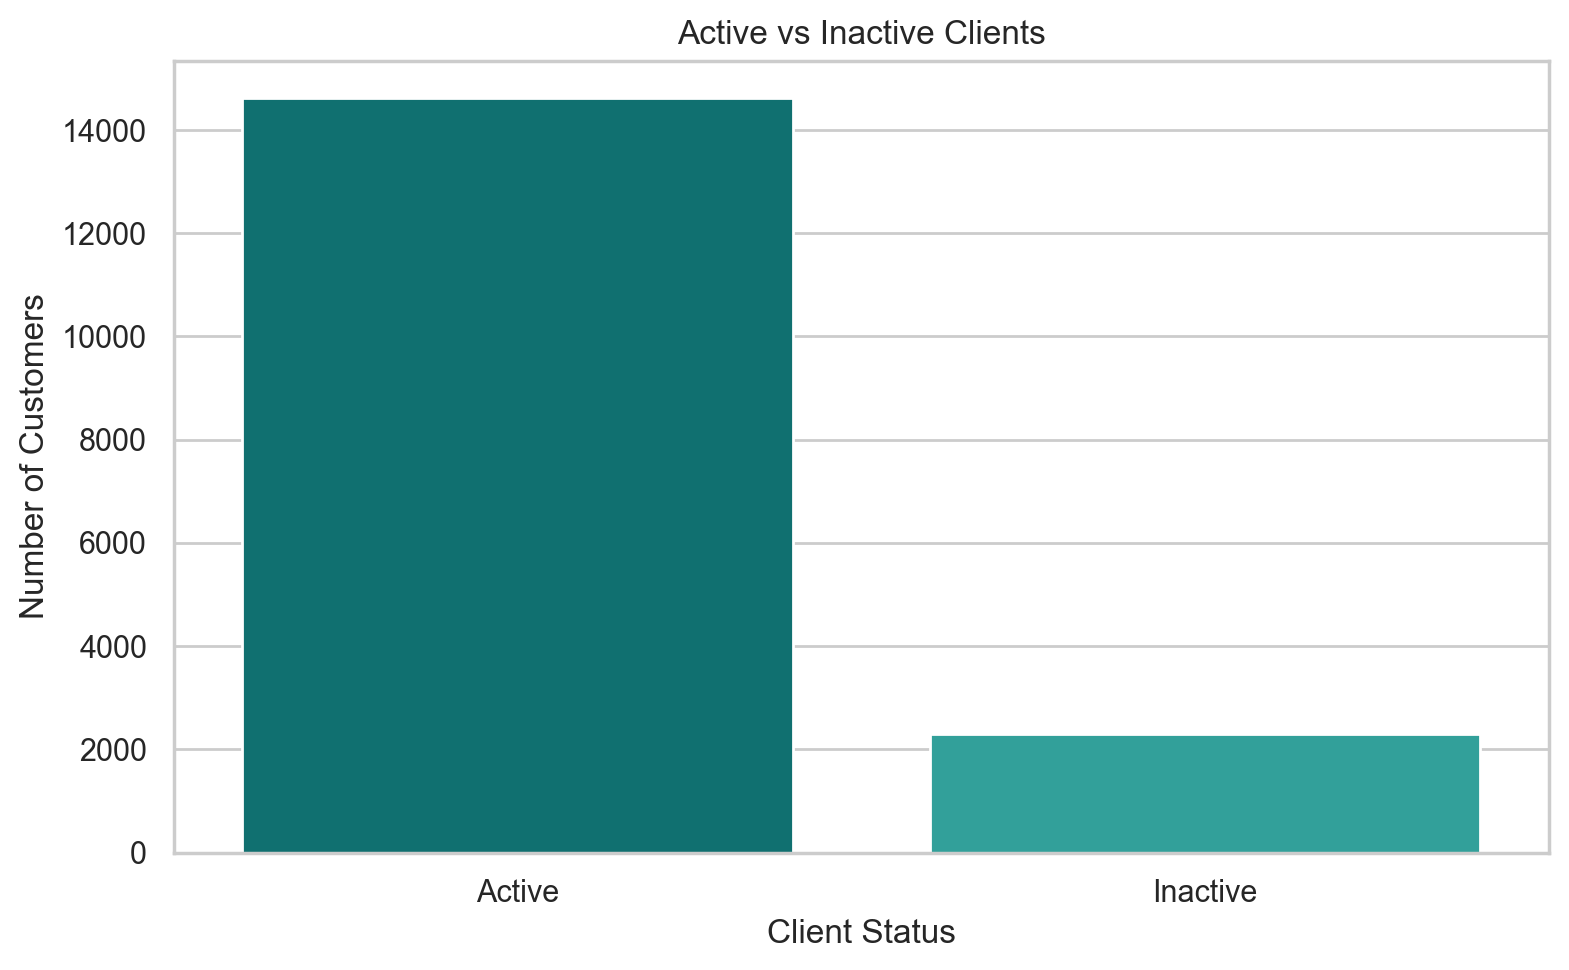

In [43]:
# Histogram of Acrtive vs Inactive Clients
sns.set() ## Reset to darkgrid

# Setting seaborn style
sns.set_style("whitegrid")

# Setting seaborn context
sns.set_context("notebook")
plt.figure(figsize=(8,5))
sns.countplot(
    data=df_customer,
    x='Active_Client',
    palette=("teal", 'lightseagreen')
)
plt.title('Active vs Inactive Clients')
plt.xlabel('Client Status')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

<h1 style="background-color: Teal; color:white; padding:3px 6px; border-radius:4px; font-weight:bold;">
Feature Selection
</h1>

CUSTOMER LIFETIME VALUE, CUSTOMER TENURE, INCOME

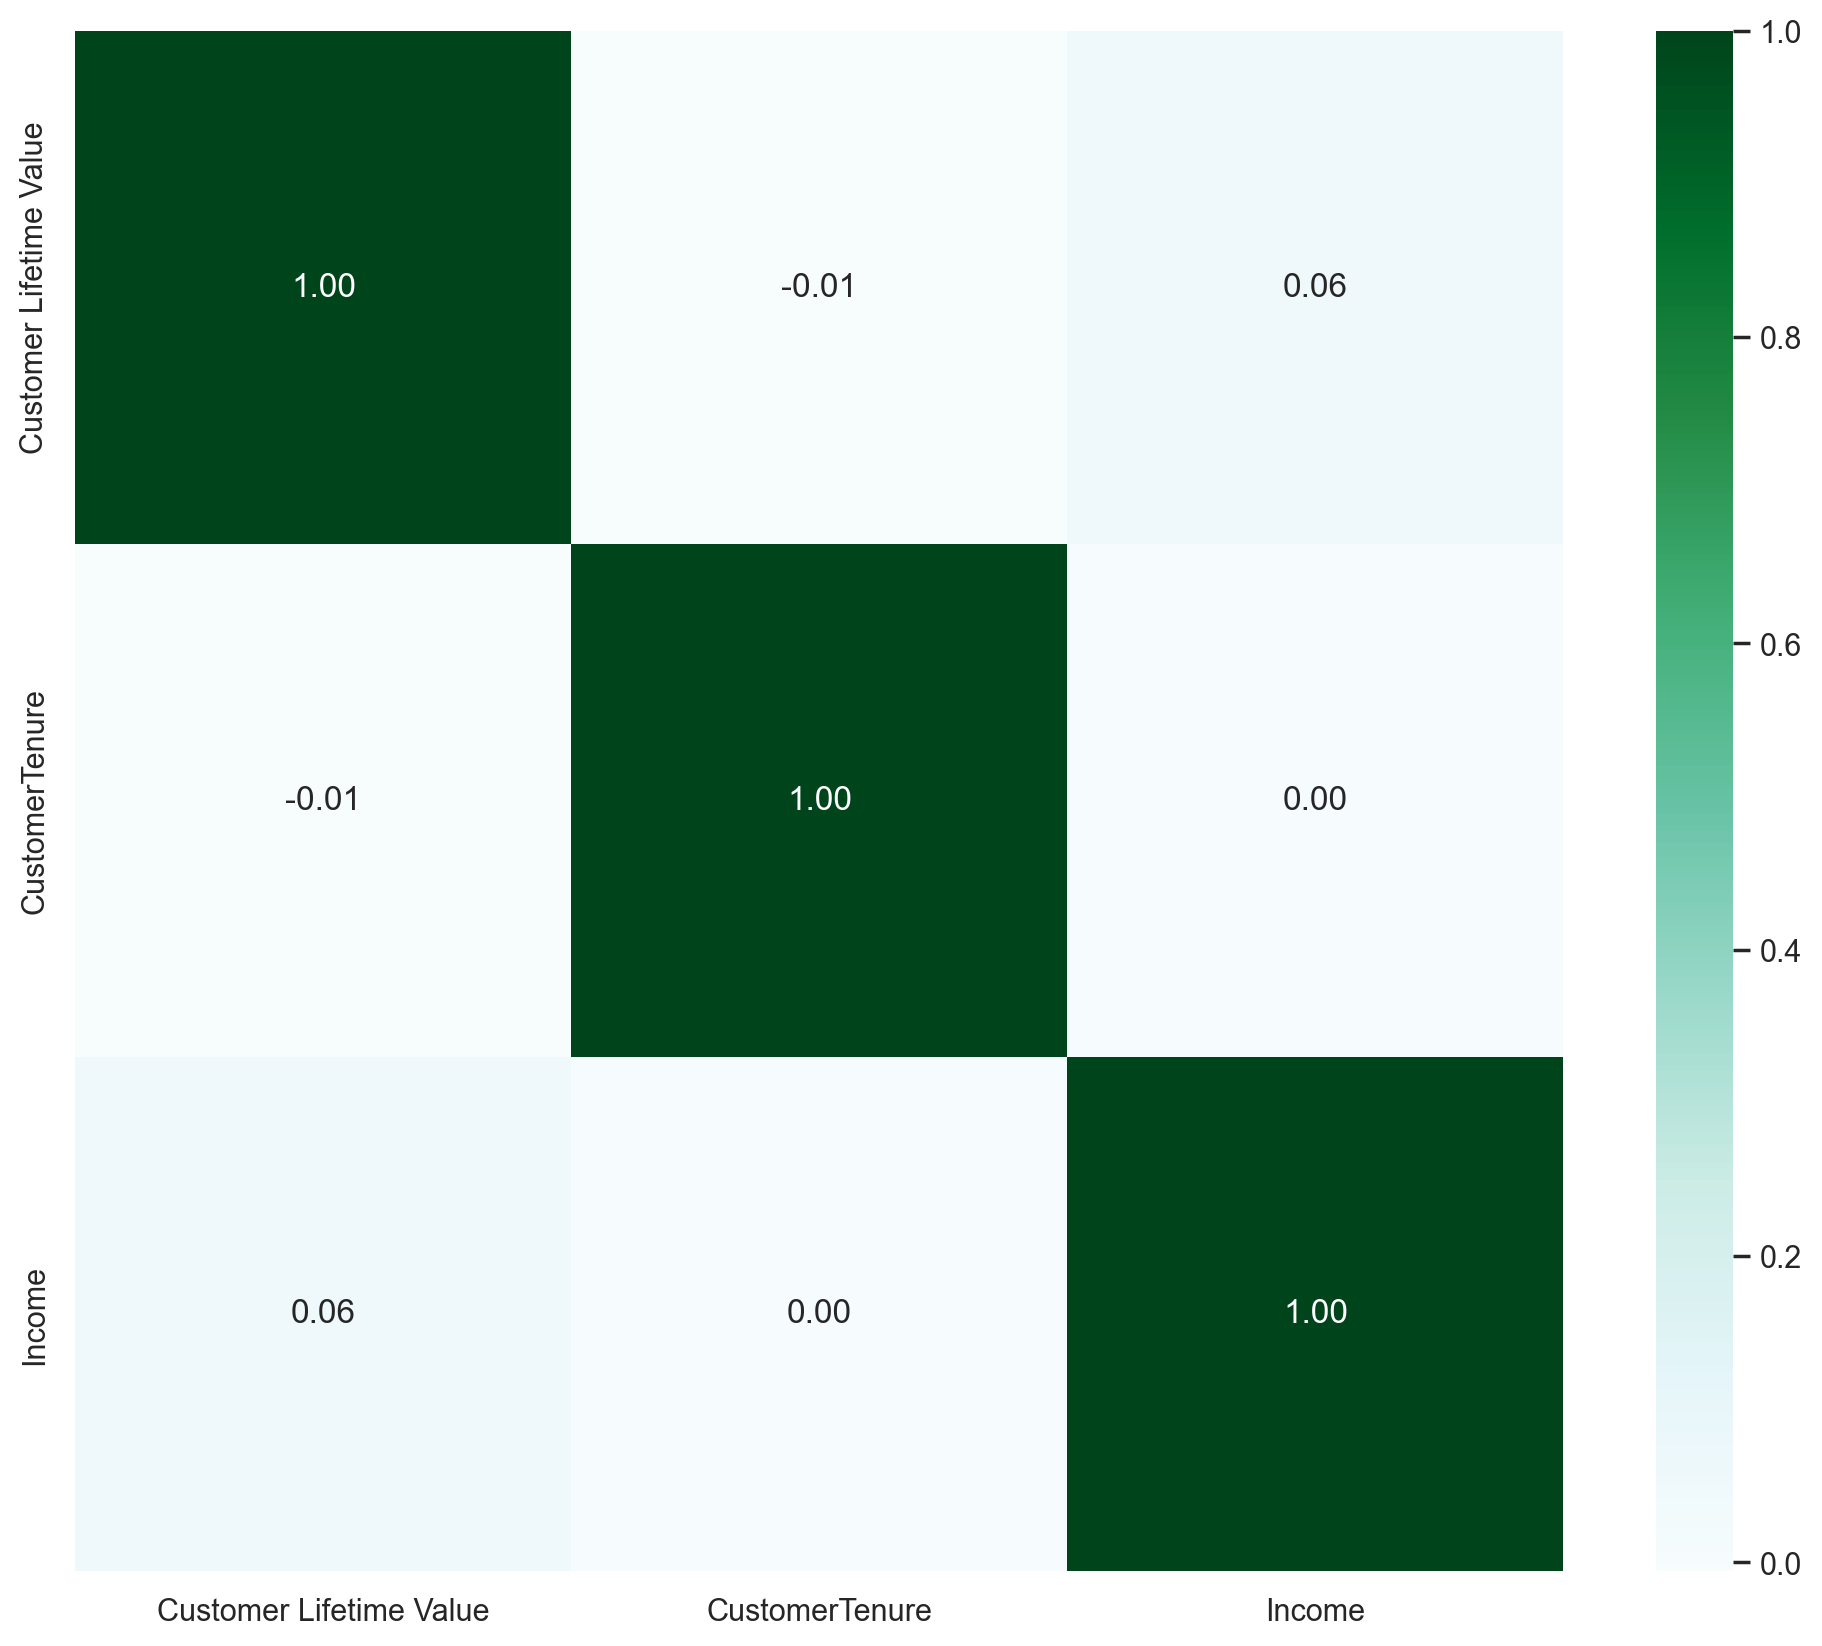

In [44]:
# Correlation Heatmap
cor_spearman = df_customer[['Customer Lifetime Value', 'CustomerTenure', 'Income']].corr(method ='spearman')
def cor_heatmap(cor):
    plt.figure(figsize=(12,10))
    sns.heatmap(data = cor, annot = True, cmap = plt.cm.BuGn, fmt='.2f')
    plt.show()
cor_heatmap(cor_spearman)

In [45]:
df_customer["Loyalty#"].count()-df_customer["Loyalty#"].nunique()

np.int64(164)

Since df_customer["Loyalty#"].nunique() is smaller than df_customer["Loyalty#"].count() and df_customer["Customer Name"].nunique() is equal to df_customer[""Customer Name""].count(), we have different people with the same Loyalty#. Since the number of times that this happen (164) is insignificant compared to the number of lines (16921) in the next delivery we will drop them and later we can pass Loyalty# to index. When we do that we can drop the 3 columns that are related with the customer name. 

In the df_customer["Country"] we have always the result "Canada" so we can drop that too. QUEREMOS MESMO ISTO???????

retirar gender e location code (com base nas analises bivariadas)

In [46]:
df_customer.drop_duplicates(subset=['Loyalty#'], keep = False, inplace=True)

In [47]:
df_customer.drop(columns=['First Name', 'Last Name', 'Customer Name', 'Gender', 'Location Code', 'Country'], inplace=True)

In [48]:
df_customer

,Unnamed: 0,Loyalty#,Province or State,City,Latitude,Longitude,Postal code,Education,Income,Marital Status,LoyaltyStatus,EnrollmentDateOpening,CancellationDate,Customer Lifetime Value,EnrollmentType,Income_Class,CustomerTenure,Active_Client
0,0,480934,Ontario,Toronto,43.653225,-79.383186,M2Z 4K1,Bachelor,70146.0,Married,Star,2019-02-15,2021-12-31,3839.14,Standard,Non-Zero Income,1050,Active
1,1,549612,Alberta,Edmonton,53.544388,-113.490930,T3G 6Y6,College,0.0,Divorced,Star,2019-03-09,2021-12-31,3839.61,Standard,Zero Income,1028,Active
2,2,429460,British Columbia,Vancouver,49.282730,-123.120740,V6E 3D9,College,0.0,Single,Star,2017-07-14,2021-01-08,3839.75,Standard,Zero Income,1274,Inactive
3,3,608370,Ontario,Toronto,43.653225,-79.383186,P1W 1K4,College,0.0,Single,Star,2016-02-17,2021-12-31,3839.75,Standard,Zero Income,2144,Active
4,4,530508,Quebec,Hull,45.428730,-75.713364,J8Y 3Z5,Bachelor,97832.0,Married,Star,2017-10-25,2021-12-31,3842.79,2021 Promotion,Non-Zero Income,1528,Active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16896,16896,823768,British Columbia,Vancouver,49.282730,-123.120740,V6E 3Z3,College,0.0,Married,Star,2015-12-22,2021-12-31,61850.19,Standard,Zero Income,2201,Active
16897,16897,680886,Saskatchewan,Regina,50.445210,-104.618900,S1J 3C5,Bachelor,78310.0,Married,Star,2017-09-06,2021-12-31,67907.27,Standard,Non-Zero Income,1577,Active
16898,16898,776187,British Columbia,Vancouver,49.282730,-123.120740,V5R 1W3,College,0.0,Single,Star,2017-03-24,2021-12-31,74228.52,Standard,Zero Income,1743,Active
16899,16899,615459,Quebec,Montreal,45.501690,-73.567253,H2Y 4R4,Bachelor,58958.0,Married,Star,2021-04-22,2021-12-22,83325.38,2021 Promotion,Non-Zero Income,244,Inactive


In [49]:
df_customer.to_csv('DM_AIAI_CustomersDB_after_eda.csv(1)', index=False)